# Project 2: Ames Housing Data and Kaggle Challenge - Model Selection Evaluation and Kaggle Submission

## Problem Statement

We are a start-up aiming to set up a Sale Price recommendation tool where users can use to get a recommended Sale Price with just a few feature characteristics about their property which users would provide and upload onto our recommendation tool. Using our proprietary machine learning algorithm, the web application generates a quote estimate for their property Sale Price.

### Contents:

- [Feature Engineering](#FeatureEngineering)
- [Modelling](#Modelling)
- [Kaggle Submission](#KaggleSubmission)
- [Conclusion and Business Recommendations](#ConclusionandBusinessRecommendations)
- [Limitations](#Limitations)

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Ridge, Lasso, ElasticNet, ElasticNetCV
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Feature Engineering and Modelling

# Import Data for Feature Engineering

In [2]:
# Training Dataset for Feature Engineering
train = pd.read_csv('../project_2/datasets/train_eda.csv')

In [3]:
# Testing Dataset for Feature Engineering
test = pd.read_csv('../project_2/datasets/test_eda.csv')

In [4]:
train.head()

,Unnamed: 0,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,land_contour,neighborhood,condition_1,...,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,sale_type,saleprice
0,0,109,60,RL,72.774648,13517,Pave,Lvl,Sawyer,RRAe,...,Attchd,1976.0,2,2.0,475.0,3,3,3,WD,130500
1,1,544,60,RL,43.000000,11492,Pave,Lvl,SawyerW,Norm,...,Attchd,1997.0,2,2.0,559.0,3,3,3,WD,220000
2,2,153,20,RL,68.000000,7922,Pave,Lvl,NAmes,Norm,...,Detchd,1953.0,1,1.0,246.0,3,3,3,WD,109000
3,3,318,60,RL,73.000000,9802,Pave,Lvl,Timber,Norm,...,BuiltIn,2007.0,3,2.0,400.0,3,3,3,WD,174000
4,4,255,50,RL,82.000000,14235,Pave,Lvl,SawyerW,Norm,...,Detchd,1957.0,1,2.0,484.0,3,3,1,WD,138500


In [5]:
test.head()

,Unnamed: 0,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,land_contour,neighborhood,condition_1,...,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,sale_type
0,0,2658,190,RM,69.0,9142,Pave,Lvl,OldTown,Norm,...,0,Detchd,1910.0,1,1,440,1,1,3,WD
1,1,2718,90,RL,0.0,9662,Pave,Lvl,Sawyer,Norm,...,0,Attchd,1977.0,3,2,580,3,3,3,WD
2,2,2414,60,RL,58.0,17104,Pave,Lvl,Gilbert,Norm,...,4,Attchd,2006.0,2,2,426,3,3,3,New
3,3,1989,30,RM,60.0,8520,Pave,Lvl,OldTown,Norm,...,0,Detchd,1935.0,1,2,480,2,3,1,WD
4,4,625,20,RL,0.0,9500,Pave,Lvl,NAmes,Norm,...,4,Attchd,1963.0,2,2,514,3,3,3,WD


In [6]:
# Remove Unnamed:0
train.drop('Unnamed: 0', axis=1, inplace=True)
test.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
train.head()

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,land_contour,neighborhood,condition_1,bldg_type,...,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,sale_type,saleprice
0,109,60,RL,72.774648,13517,Pave,Lvl,Sawyer,RRAe,1Fam,...,Attchd,1976.0,2,2.0,475.0,3,3,3,WD,130500
1,544,60,RL,43.000000,11492,Pave,Lvl,SawyerW,Norm,1Fam,...,Attchd,1997.0,2,2.0,559.0,3,3,3,WD,220000
2,153,20,RL,68.000000,7922,Pave,Lvl,NAmes,Norm,1Fam,...,Detchd,1953.0,1,1.0,246.0,3,3,3,WD,109000
3,318,60,RL,73.000000,9802,Pave,Lvl,Timber,Norm,1Fam,...,BuiltIn,2007.0,3,2.0,400.0,3,3,3,WD,174000
4,255,50,RL,82.000000,14235,Pave,Lvl,SawyerW,Norm,1Fam,...,Detchd,1957.0,1,2.0,484.0,3,3,1,WD,138500


In [8]:
test.head()

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,land_contour,neighborhood,condition_1,bldg_type,...,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,sale_type
0,2658,190,RM,69.0,9142,Pave,Lvl,OldTown,Norm,2fmCon,...,0,Detchd,1910.0,1,1,440,1,1,3,WD
1,2718,90,RL,0.0,9662,Pave,Lvl,Sawyer,Norm,Duplex,...,0,Attchd,1977.0,3,2,580,3,3,3,WD
2,2414,60,RL,58.0,17104,Pave,Lvl,Gilbert,Norm,1Fam,...,4,Attchd,2006.0,2,2,426,3,3,3,New
3,1989,30,RM,60.0,8520,Pave,Lvl,OldTown,Norm,1Fam,...,0,Detchd,1935.0,1,2,480,2,3,1,WD
4,625,20,RL,0.0,9500,Pave,Lvl,NAmes,Norm,1Fam,...,4,Attchd,1963.0,2,2,514,3,3,3,WD


In [9]:
print(train.shape)
print(test.shape)

(2045, 51)
(878, 50)


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2045 entries, 0 to 2044
Data columns (total 51 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              2045 non-null   int64  
 1   ms_subclass     2045 non-null   int64  
 2   ms_zoning       2045 non-null   object 
 3   lot_frontage    2045 non-null   float64
 4   lot_area        2045 non-null   int64  
 5   street          2045 non-null   object 
 6   land_contour    2045 non-null   object 
 7   neighborhood    2045 non-null   object 
 8   condition_1     2045 non-null   object 
 9   bldg_type       2045 non-null   object 
 10  house_style     2045 non-null   object 
 11  overall_qual    2045 non-null   int64  
 12  overall_cond    2045 non-null   int64  
 13  year_built      2045 non-null   int64  
 14  year_remod/add  2045 non-null   int64  
 15  roof_style      2045 non-null   object 
 16  exterior_2nd    2045 non-null   object 
 17  mas_vnr_type    2045 non-null   o

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 50 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              878 non-null    int64  
 1   ms_subclass     878 non-null    int64  
 2   ms_zoning       878 non-null    object 
 3   lot_frontage    878 non-null    float64
 4   lot_area        878 non-null    int64  
 5   street          878 non-null    object 
 6   land_contour    878 non-null    object 
 7   neighborhood    878 non-null    object 
 8   condition_1     878 non-null    object 
 9   bldg_type       878 non-null    object 
 10  house_style     878 non-null    object 
 11  overall_qual    878 non-null    int64  
 12  overall_cond    878 non-null    int64  
 13  year_built      878 non-null    int64  
 14  year_remod/add  878 non-null    int64  
 15  roof_style      878 non-null    object 
 16  exterior_2nd    878 non-null    object 
 17  mas_vnr_type    878 non-null    obj

# Correlation Analysis for Numerical Features

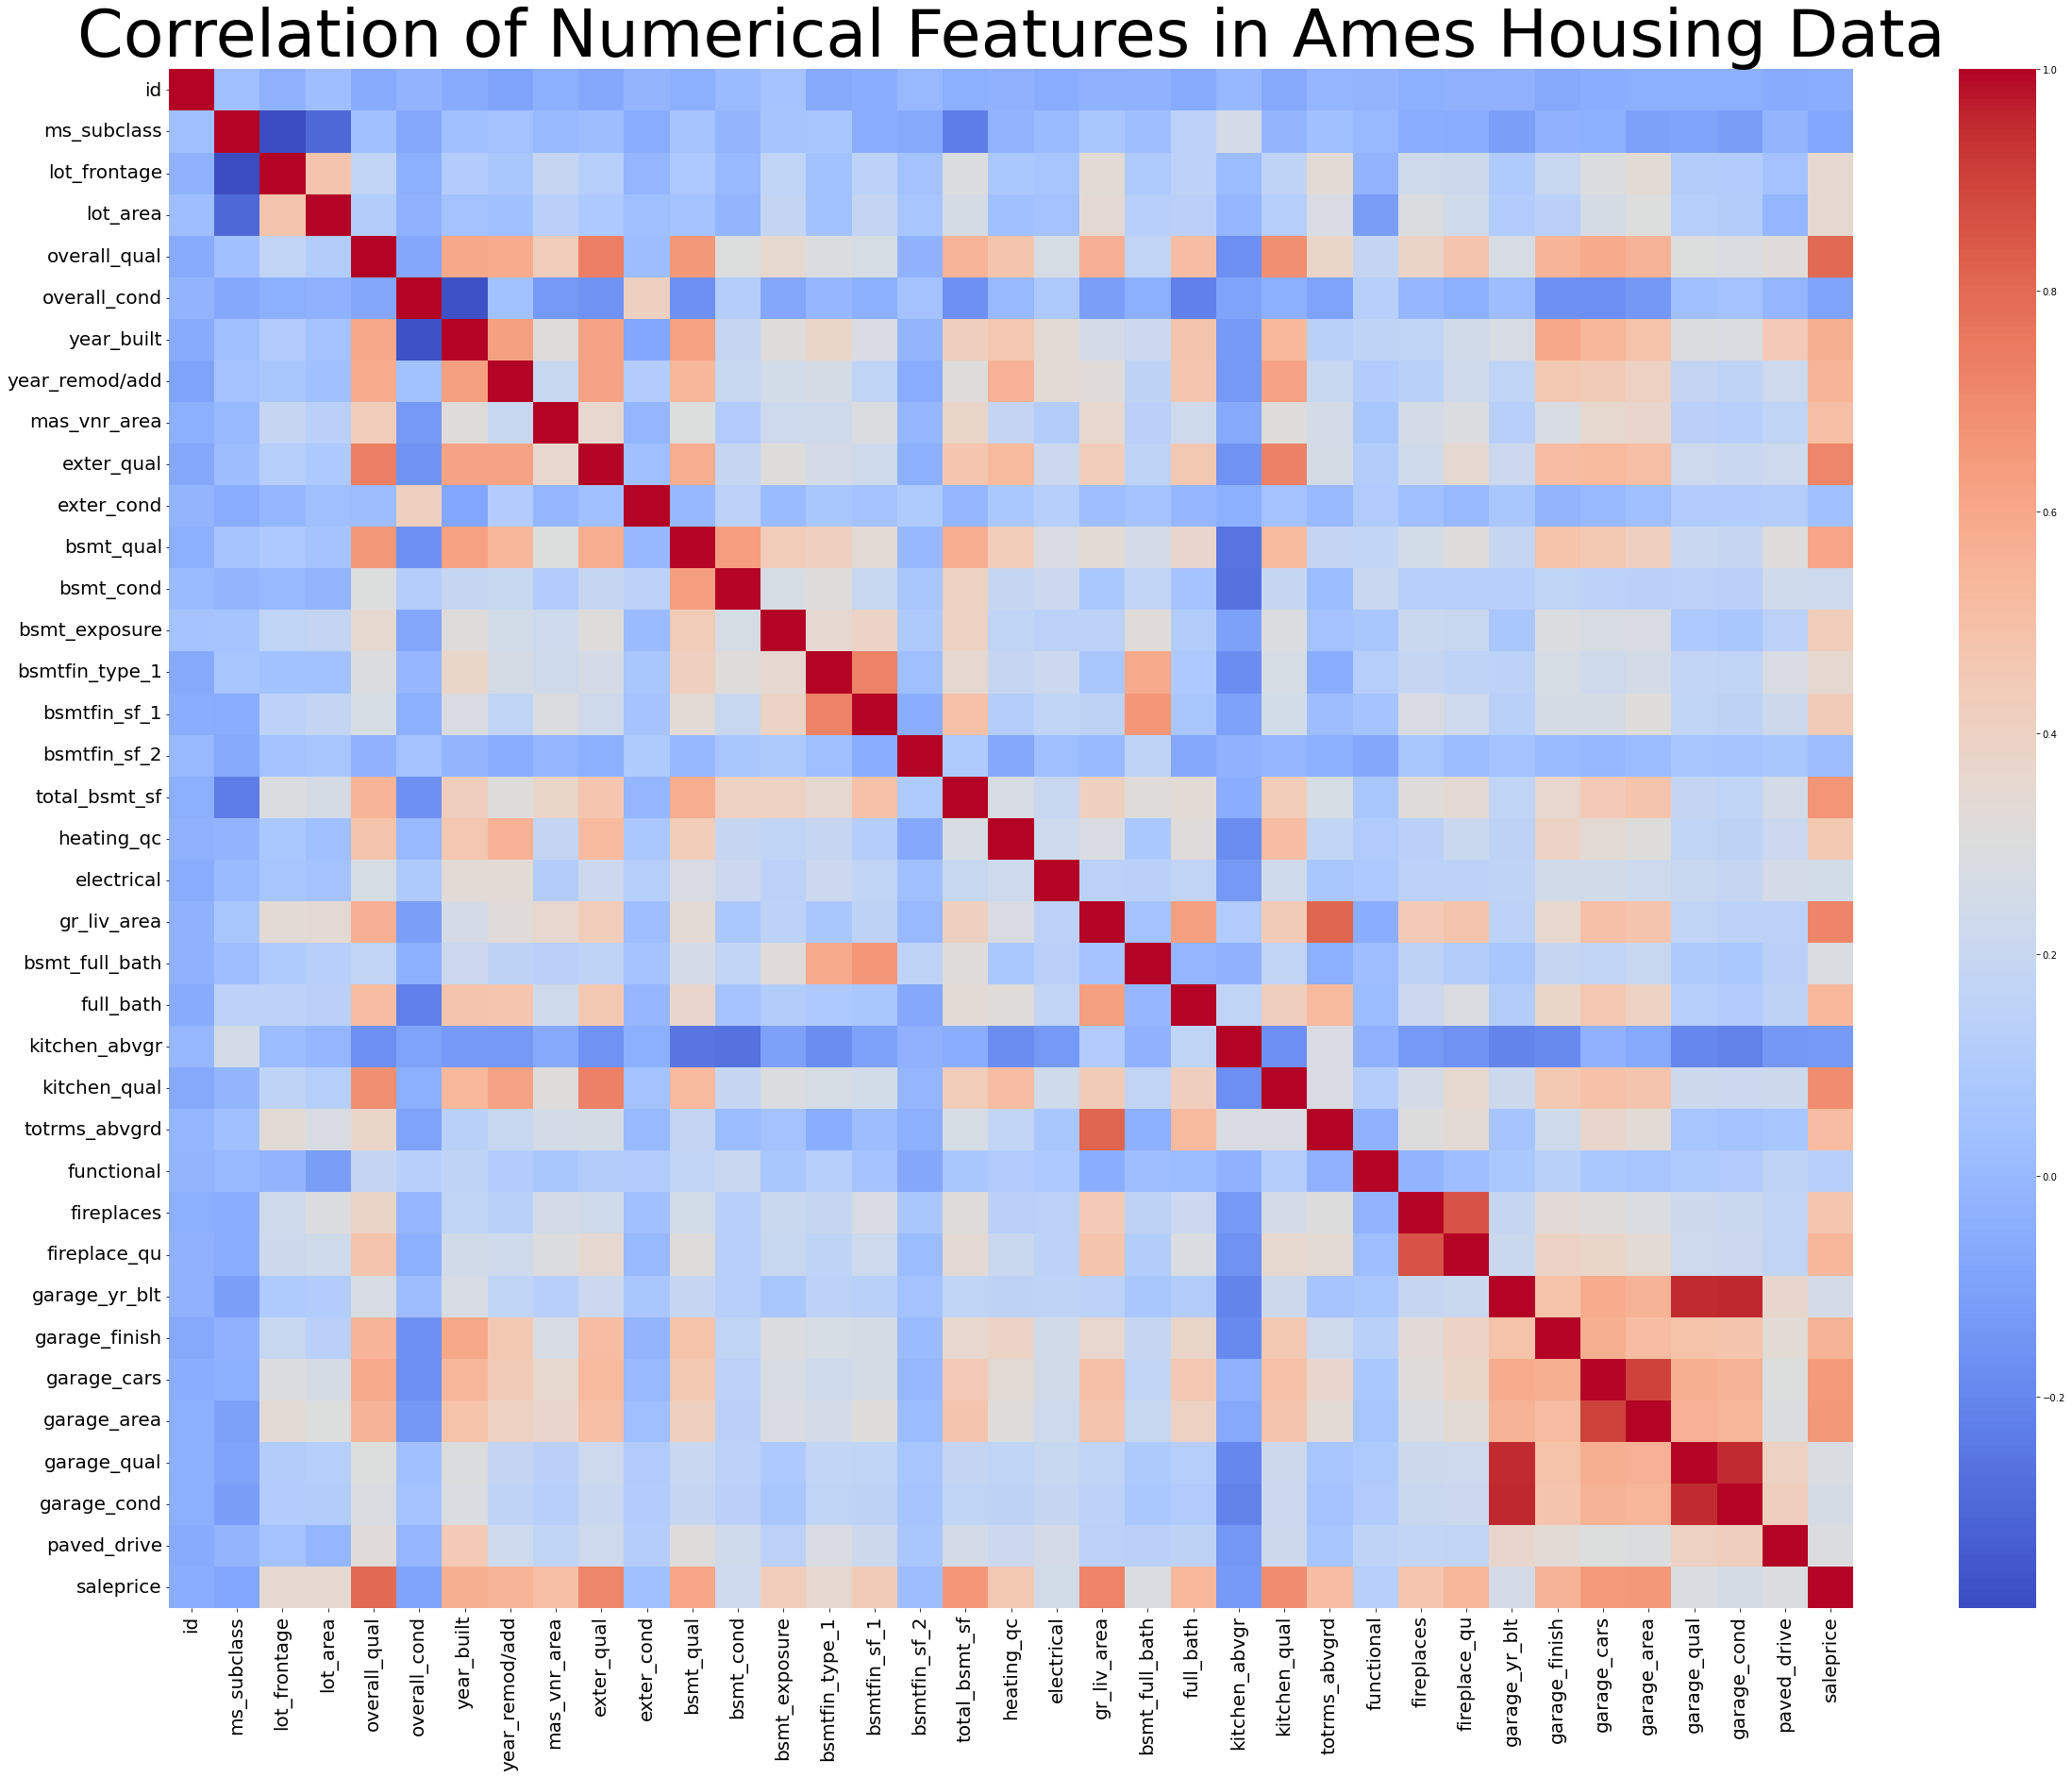

In [12]:
fig, ax = plt.subplots(figsize = (40, 30))

sns.heatmap(train.corr(), cmap='coolwarm')
ax.tick_params(labelsize=20)
plt.title('Correlation of Numerical Features in Ames Housing Data', fontsize=70);

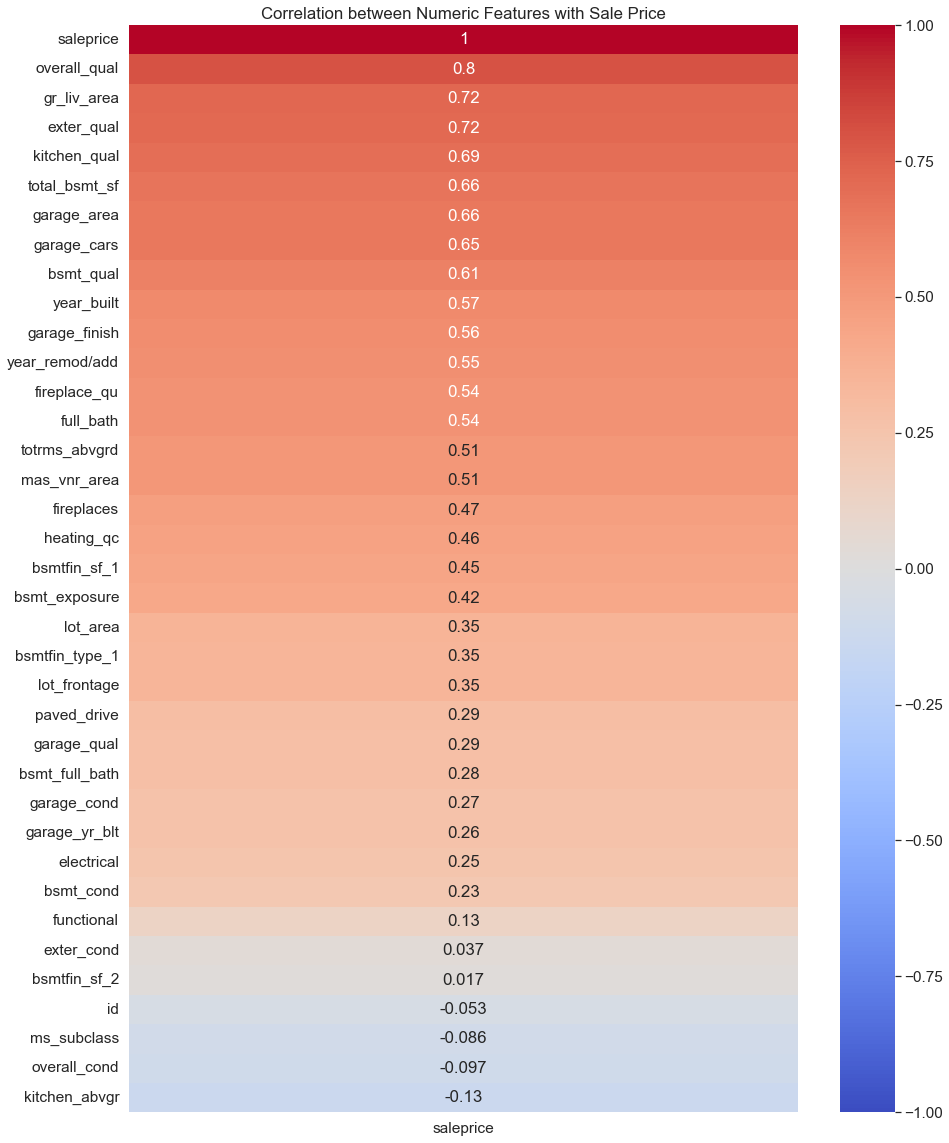

In [13]:
train_corr = train.corr()

plt.figure(figsize=(15,20))
sns.set(font_scale=1.4)
sns.heatmap(train_corr[['saleprice']].sort_values(by=['saleprice'], ascending=False),
            vmin=-1,
            cmap='coolwarm',
            annot=True)
plt.title('Correlation between Numeric Features with Sale Price');

# Top 10 Features Correlated with Sales Price

- Let us look at which features are the top 10 highly correlated

In [14]:
train.corr().nlargest(11, 'saleprice')['saleprice'].index

Index(['saleprice', 'overall_qual', 'gr_liv_area', 'exter_qual',
       'kitchen_qual', 'total_bsmt_sf', 'garage_area', 'garage_cars',
       'bsmt_qual', 'year_built', 'garage_finish'],
      dtype='object')

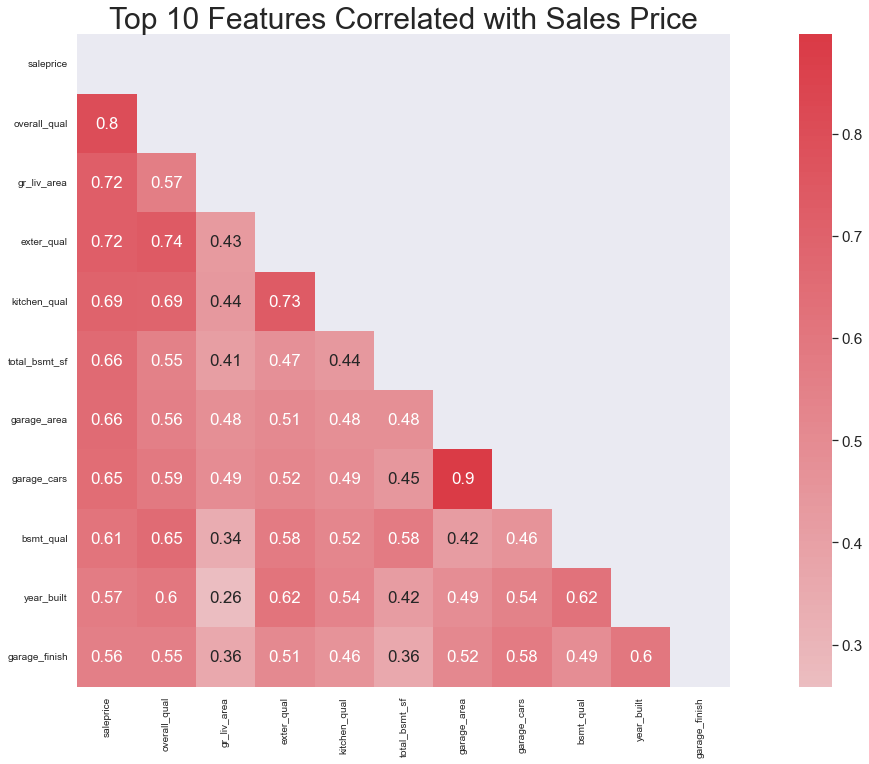

In [15]:
# Diagonal Heatmap using correlated features found above

fig, ax = plt.subplots(figsize = (25,12))

mask = np.zeros_like(train[['saleprice', 'overall_qual', 'gr_liv_area', 'exter_qual',
       'kitchen_qual', 'total_bsmt_sf', 'garage_area', 'garage_cars',
       'bsmt_qual', 'year_built', 'garage_finish']].corr())
mask[np.triu_indices_from(mask)] = True

sns.heatmap(train[['saleprice', 'overall_qual', 'gr_liv_area', 'exter_qual',
       'kitchen_qual', 'total_bsmt_sf', 'garage_area', 'garage_cars',
       'bsmt_qual', 'year_built', 'garage_finish']].corr(), mask=mask, annot=True, center = 0, cmap = sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax)
ax.tick_params(labelsize=10)
plt.title('Top 10 Features Correlated with Sales Price', fontsize=30);

- From the above diagonal heatmap we can surmise that Sale Price is most correlated to overall_qual, gr_living_area, exter_qual, kitchen_qual, total_bsmt_sf, garage_area
- There may be multi-collinearity issues with garage and basement features will be explored in greater detail

# Modelling Features: Numeric and Non-Numeric

## Numeric

### Assemble our predictor variables (X) and our target (y) - Numeric Features only 

In [16]:
X = train.drop('saleprice', axis=1).select_dtypes([np.number])
y = train["saleprice"]

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2045 entries, 0 to 2044
Data columns (total 36 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              2045 non-null   int64  
 1   ms_subclass     2045 non-null   int64  
 2   lot_frontage    2045 non-null   float64
 3   lot_area        2045 non-null   int64  
 4   overall_qual    2045 non-null   int64  
 5   overall_cond    2045 non-null   int64  
 6   year_built      2045 non-null   int64  
 7   year_remod/add  2045 non-null   int64  
 8   mas_vnr_area    2045 non-null   float64
 9   exter_qual      2045 non-null   int64  
 10  exter_cond      2045 non-null   int64  
 11  bsmt_qual       2045 non-null   int64  
 12  bsmt_cond       2045 non-null   int64  
 13  bsmt_exposure   2045 non-null   int64  
 14  bsmtfin_type_1  2045 non-null   int64  
 15  bsmtfin_sf_1    2045 non-null   float64
 16  bsmtfin_sf_2    2045 non-null   float64
 17  total_bsmt_sf   2045 non-null   f

In [18]:
print(X.shape)
print(y.shape)

(2045, 36)
(2045,)


# Preliminary Linear Regression Model with Numeric Values

 ### Train/Test Split - Numeric Features only

In [19]:
# Create train/test splits.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

 ### Standard Scaling - Numeric Features only

In [20]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

## Linear Regression - Numeric Features only

- We will run a simple linear regression model on the numeric features alone

### Instantiate and Fit Linear Regression model - Numeric Features only

In [21]:
lr = LinearRegression()
lr.fit(X_train_ss, y_train)

LinearRegression()

### Cross Validation Linear Regression - Numeric Features only

In [22]:
# Cross Validating Linear Regression Model on Training Data
cross_val = cross_val_score(lr, X_train_ss, y_train, cv=10)
print('Linear Regression Cross Validation Scores: ', cross_val)

Linear Regression Cross Validation Scores:  [0.86829263 0.84984352 0.90166148 0.88514615 0.86012429 0.90382428
 0.89991357 0.88262689 0.88873486 0.91790227]


In [23]:
# Mean Cross Val Score - Linear Regression Model on Training Data
lr_cv_mean = cross_val.mean()
print('Linear Regression Mean Cross Validation Score: ', np.mean(cross_val))

Linear Regression Mean Cross Validation Score:  0.8858069933117638


In [24]:
# Standard Deviation Cross Val Score - Linear Regression Model on Training Data
lr_cv_std_dev = cross_val.std()
print('Linear Regression Cross Validation Scores Standard Deviation: ', np.std(cross_val))

Linear Regression Cross Validation Scores Standard Deviation:  0.02020875410455479


### Linear Regression Train Score - Numeric Features only

In [25]:
# Train Score
lr_train = lr.score(X_train_ss, y_train)
lr_train

0.8941537139910487

### Linear Regression Test Score - Numeric Features only

In [26]:
# Test Score
lr_test = lr.score(X_test_ss, y_test)
print('Linear Regression Prediction score: ', lr_test)

Linear Regression Prediction score:  0.8878062269435595


### Linear Regression predictions - Numeric Features only

In [27]:
y_train_pred = lr.predict(X_train_ss)
y_test_pred = lr.predict(X_test_ss)

### Evaluate the Linear Regression Model - Numeric Features only

In [28]:
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

perc_diff = (mse_train - mse_test)/mse_train * 100
print(mse_train, mse_test, str(perc_diff)+"%")

669447424.3227742 688411997.5424521 -2.832869696804473%


In [29]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

perc_diff = (rmse_train - rmse_test)/rmse_train * 100
print(rmse_train, rmse_test, str(perc_diff)+"%")

25873.682078953785 26237.60655133109 -1.406543031899308%


In [30]:
# check for underfit - is your linear regression model better than average of y?
y_train_average=np.repeat(np.mean(y_train),(len(y_train)))
               
mse_train_avg = mean_squared_error(y_train, y_train_average)
print(mse_train_avg)

6324713408.141313


#### Summary of Linear Regression on Training Data with Numeric Features Only
Linear Regression Mean Cross Validation Score:  0.8860284238829786  
Linear Regression Prediction score:  0.8923853305152996  
RMSE Train Score:  26168.170529348692  
RMSE Test Score:  **25237.99618699387**  
RMSE Percentage Difference:  **3.5546021121789626%**

- The performance of Linear Regression model on numeric features alone is not bad, now we will explore how it will perform when we convert the ordinal and nominal features 
- We can use this RMSE Score of 25237.99618699387 as our **baseline score for model evaluation**

### Visualising Linear Regression Model - Numeric Features only

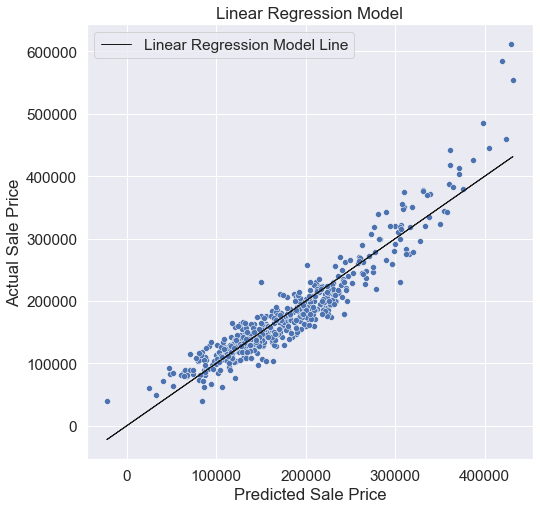

In [31]:
# Plotting the actual vs predicted price

plt.subplots(figsize=(8,8))
sns.scatterplot(x=y_test_pred, y=y_test)

plt.xlabel("Predicted Sale Price")
plt.ylabel("Actual Sale Price")
plt.title("Linear Regression Model")
plt.plot(y_test_pred, y_test_pred, color = "k", linewidth=1, label="Linear Regression Model Line")
plt.legend(loc="upper left");

## Non-Numeric

## Exploring Nominal Variables

In [32]:
train.select_dtypes(include=['object']).columns

Index(['ms_zoning', 'street', 'land_contour', 'neighborhood', 'condition_1',
       'bldg_type', 'house_style', 'roof_style', 'exterior_2nd',
       'mas_vnr_type', 'foundation', 'central_air', 'garage_type',
       'sale_type'],
      dtype='object')

In [33]:
test.select_dtypes(include=['object']).columns

Index(['ms_zoning', 'street', 'land_contour', 'neighborhood', 'condition_1',
       'bldg_type', 'house_style', 'roof_style', 'exterior_2nd',
       'mas_vnr_type', 'foundation', 'central_air', 'garage_type',
       'sale_type'],
      dtype='object')

# Conversion of Nominal Features (Categorical Variables) to Numeric

## Using Get Dummies to convert Nominal Features to Numeric

In [34]:
train_nominal = pd.get_dummies(train[train.select_dtypes(include=['object']).columns],drop_first=True)
pd.set_option('display.max_columns', 500)
train_nominal.head()

,ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,street_Pave,land_contour_HLS,land_contour_Low,land_contour_Lvl,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition_1_Feedr,condition_1_Norm,condition_1_PosA,condition_1_PosN,condition_1_RRAe,condition_1_RRAn,condition_1_RRNe,condition_1_RRNn,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Plywood,exterior_2nd_Stone,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,mas_vnr_type_BrkFace,mas_vnr_type_None,mas_vnr_type_Stone,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,central_air_Y,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD
0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1


In [35]:
test_nominal = pd.get_dummies(test[test.select_dtypes(include=['object']).columns],drop_first=True)
pd.set_option('display.max_columns', 500)
test_nominal.head()

,ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,street_Pave,land_contour_HLS,land_contour_Low,land_contour_Lvl,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_IDOTRR,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition_1_Feedr,condition_1_Norm,condition_1_PosA,condition_1_PosN,condition_1_RRAe,condition_1_RRAn,condition_1_RRNe,condition_1_RRNn,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Other,exterior_2nd_Plywood,exterior_2nd_PreCast,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,mas_vnr_type_BrkFace,mas_vnr_type_CBlock,mas_vnr_type_None,mas_vnr_type_Stone,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,central_air_Y,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD
0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [36]:
train_nominal.shape

(2045, 97)

In [37]:
test_nominal.shape

(878, 97)

- We now have 70 features purely from nominal features after get dummies

# Preliminary Linear Regression Model with Converted Nominal Features

In [38]:
X = train_nominal
y = train['saleprice']

In [39]:
# Create train/test splits.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#Standard Scaling
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

#Instantiate and Fit
lr = LinearRegression()
lr.fit(X_train_ss, y_train)


# Cross Validating Linear Regression Model on Training Data
cross_val = cross_val_score(lr, X_train_ss, y_train, cv=10)
print('Linear Regression Cross Validation Scores: ', cross_val)

# Mean Cross Val Score - Linear Regression Model on Training Data
lr_cv_mean = cross_val.mean()
print('Linear Regression Mean Cross Validation Score: ', np.mean(cross_val))

# Standard Deviation Cross Val Score - Linear Regression Model on Training Data
lr_cv_std_dev = cross_val.std()
print('Linear Regression Cross Validation Scores Standard Deviation: ', np.std(cross_val))

# Train Score
lr_train = lr.score(X_train_ss, y_train)
lr_train
print('Linear Regression Prediction Train score: ', lr_train)

# Test Score
lr_test = lr.score(X_test_ss, y_test)
print('Linear Regression Prediction Test score: ', lr_test)

y_train_pred = lr.predict(X_train_ss)
y_test_pred = lr.predict(X_test_ss)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
perc_diff = (mse_train - mse_test)/mse_train * 100
print(mse_train, mse_test, str(perc_diff)+"%")
print('MSE Train Score: ', mse_train)
print('MSE Test Score: ', mse_test)
print('MSE Percentage Difference: ', perc_diff)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
perc_diff = (rmse_train - rmse_test)/rmse_train * 100
print(mse_train, mse_test, str(perc_diff)+"%")
print('RMSE Train Score: ', rmse_train)
print('RMSE Test Score: ', rmse_test)
print('RMSE Percentage Difference: ', perc_diff)

Linear Regression Cross Validation Scores:  [-1.10104212e+16  6.47739862e-01  7.48901294e-01  7.11357046e-01
  7.55234977e-01  6.09246967e-01 -7.33594638e+23 -6.07661062e+24
  6.53444242e-01  6.16887741e-01]
Linear Regression Mean Cross Validation Score:  -6.81020527032315e+23
Linear Regression Cross Validation Scores Standard Deviation:  1.8117800130328384e+24
Linear Regression Prediction Train score:  0.7389368512805904
Linear Regression Prediction Test score:  -1.2130036915053254e+22
1651149597.0772395 7.442893411521764e+31 -4.5077038595998223e+24%
MSE Train Score:  1651149597.0772395
MSE Test Score:  7.442893411521764e+31
MSE Percentage Difference:  -4.5077038595998223e+24
1651149597.0772395 7.442893411521764e+31 -21231353841800.48%
RMSE Train Score:  40634.34012110003
RMSE Test Score:  8627220532432079.0
RMSE Percentage Difference:  -21231353841800.48


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


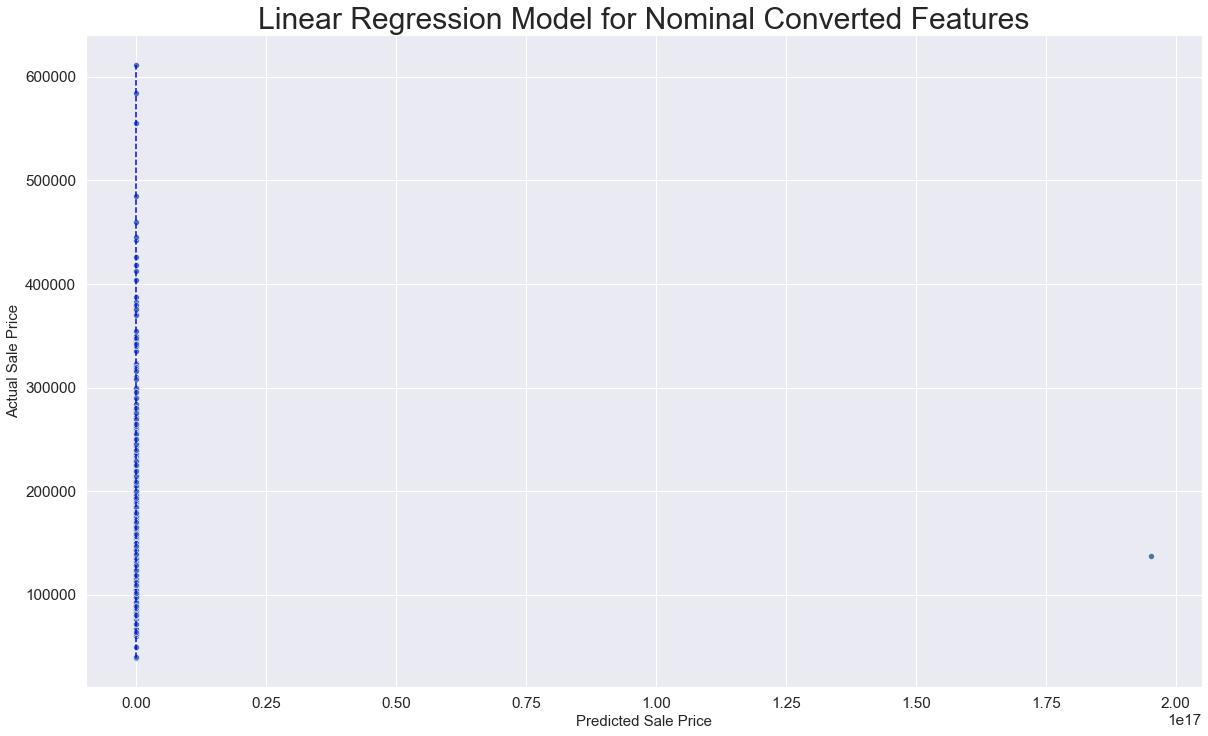

In [40]:
# Plotting the actual vs predicted price
plt.figure(figsize = (20,12))
sns.scatterplot(y_test_pred, y_test)
plt.title('Linear Regression Model for Nominal Converted Features', fontsize=30)
plt.xlabel('Predicted Sale Price', fontsize=15)
plt.ylabel('Actual Sale Price', fontsize=15)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], c='blue', linestyle='--');

#### Summary of Linear Regression Model with Converted Nominal Features Only  
Linear Regression Mean Cross Validation Score:  -2.5286774453378065e+23  
Linear Regression Prediction score:  -1.599982358841033e+21  
RMSE Train Score:  40832.0494709497  
RMSE Test Score:  3077348839480841.0  
RMSE Percentage Difference:  -7536601467015.302

- Nominal values Linear Regression performs worse than Numeric Values Linear Regression.
- The plot is vertical because of the scale of the X axis.
- This is not a good model and has a vey large root mean squared error

# Preliminary Lasso Regression Model with Converted Nominal Features

In [41]:
# Create train/test splits.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#Standard Scaling
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

#Instantiate and Fit
lasso = LassoCV(n_alphas=500, cv=10)
lasso.fit(X_train_ss, y_train)
print('Optimal alpha: ', lasso.alpha_)
optimal_lasso = Lasso(alpha=lasso.alpha_)
optimal_lasso_scores = cross_val_score(optimal_lasso, X_train, y_train, cv=10)

# Lasso Regression Cross Validation Scores
print('Lasso Regression Cross Validation Scores: ', optimal_lasso_scores)

# Mean Cross Val Score - Linear Regression Model on Training Data
print('Lasso Regression Cross Validation Mean Score: ', np.mean(optimal_lasso_scores))

# Standard Deviation Cross Val Score - Linear Regression Model on Training Data
print('Lasso Regression Cross Validation Standard Deviation Score: ', np.std(optimal_lasso_scores))

# Fit to Optimal Lasso
optimal_lasso.fit(X_train,y_train)
y_train_pred = optimal_lasso.predict(X_train_ss)
y_test_pred = optimal_lasso.predict(X_test_ss)

print('Lasso Regression Prediction Score: ', optimal_lasso.score(X_test_ss, y_test))
print('RMSE Test: ', np.sqrt(mean_squared_error(y_test_pred, y_test)))
print('RMSE Train: ', np.sqrt(mean_squared_error(y_train_pred, y_train)))
perc_diff = (np.sqrt(mean_squared_error(y_train_pred, y_train)) - np.sqrt(mean_squared_error(y_test_pred, y_test)))/np.sqrt(mean_squared_error(y_train_pred, y_train)) * 100
print('RMSE Percentage Difference: ', perc_diff)

Optimal alpha:  41.95186260854611
Lasso Regression Cross Validation Scores:  [0.73607265 0.65359365 0.73725787 0.71294062 0.74103001 0.58995063
 0.65760414 0.71424421 0.65321291 0.65981598]
Lasso Regression Cross Validation Mean Score:  0.6855722662303743
Lasso Regression Cross Validation Standard Deviation Score:  0.04746284795255389
Lasso Regression Prediction Score:  -12.836235921780426
RMSE Test:  291372.6727822952
RMSE Train:  281970.26206490956
RMSE Percentage Difference:  -3.3345398371198485


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


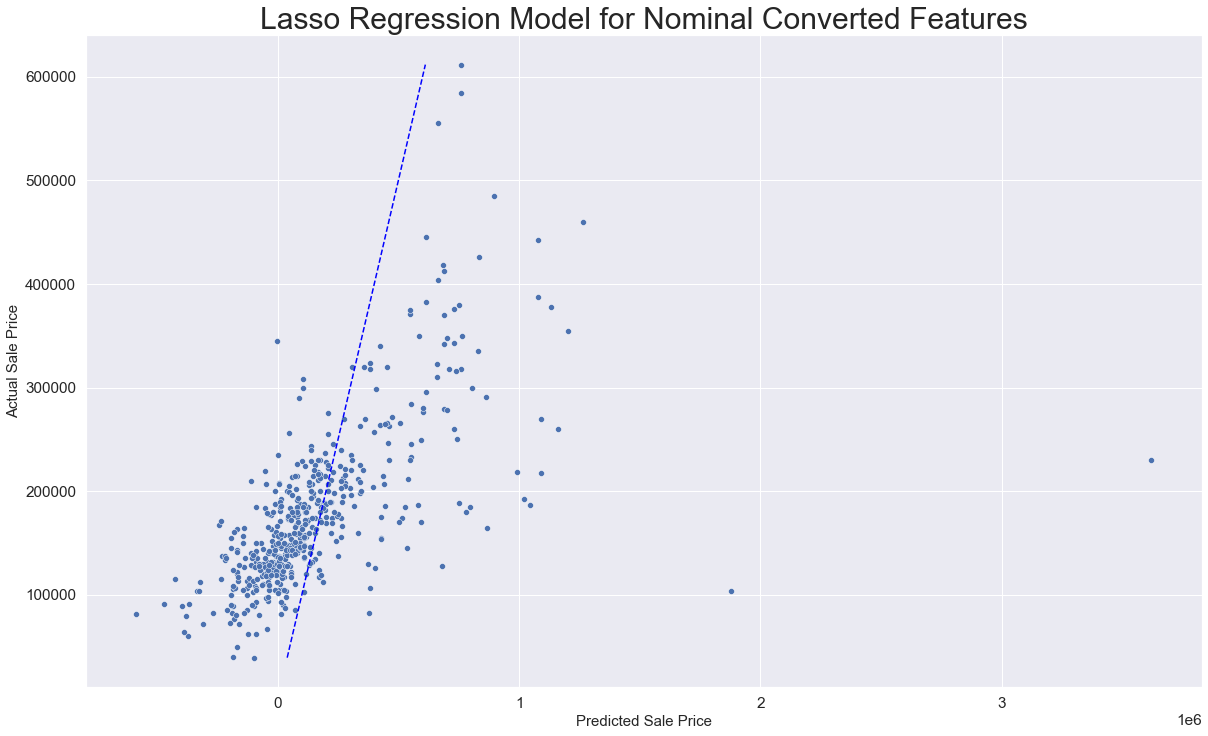

In [42]:
plt.figure(figsize = (20,12))
sns.scatterplot(y_test_pred, y_test)
plt.title('Lasso Regression Model for Nominal Converted Features', fontsize=30)
plt.xlabel('Predicted Sale Price', fontsize=15)
plt.ylabel('Actual Sale Price', fontsize=15)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], c='blue', linestyle='--');

#### Summary of Lasso Regression Model with Converted Nominal Features Only  
Lasso Regression Mean Cross Validation Score:  0.6517589312780455  
Lasso Regression Prediction score:  -3.5958839284692017  
RMSE Train Score:  164931.5187804694  
RMSE Test Score:  168756.13373104628  
RMSE Percentage Difference:  2.2663561116375974

- The lasso model used on converted nominal variables is better
- We shall investigate further the features used by lasso model

### Lasso Coefficients for Converted Nominal Variables

In [43]:
optimal_lasso_coefs = pd.DataFrame({'variable':X_train.columns,
                            'coef':optimal_lasso.coef_,
                            'abs_coef':np.abs(optimal_lasso.coef_)})
optimal_lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)
print('Percent variables zeroed out: ', np.sum((optimal_lasso.coef_ == 0))/float(X_train.shape[1]))

Percent variables zeroed out:  0.26804123711340205


In [44]:
optimal_lasso_coefs.head(50)

,variable,coef,abs_coef
51,house_style_2.5Fin,110463.948325,110463.948325
34,neighborhood_StoneBr,93456.816211,93456.816211
19,neighborhood_GrnHill,92921.886801,92921.886801
28,neighborhood_NridgHt,76977.778946,76977.778946
27,neighborhood_NoRidge,71722.784149,71722.784149
36,neighborhood_Veenker,71640.170391,71640.170391
52,house_style_2.5Unf,63705.921818,63705.921818
22,neighborhood_MeadowV,-59808.224258,59808.224258
47,bldg_type_Twnhs,-55396.675511,55396.675511
20,neighborhood_IDOTRR,-52805.993303,52805.993303


- 60% of the ceofficients were zeroed out, and we can see the highest coefficents are that of the neighbourhood which is an important feature for our purposes

# Combining all Features

In [45]:
# Original Train Shape
print(train.shape)

(2045, 51)


In [46]:
# Original Test Shape
print(test.shape)

(878, 50)


In [47]:
# Train Shape of Numeric Features
print(train.select_dtypes(include=[np.number]).shape)

(2045, 37)


In [48]:
# Test Shape of Numeric Features
print(test.select_dtypes(include=[np.number]).shape)

(878, 36)


In [49]:
# Train Shape of Nominal Features
print(train.select_dtypes(include=['object']).shape)

(2045, 14)


In [50]:
# Test Shape of Nominal Features
print(test.select_dtypes(include=['object']).shape)

(878, 14)


In [51]:
# Train Shape of Nominal Features converted to Numeric through Get Dummies
print(train_nominal.shape)

(2045, 97)


In [52]:
# Test Shape of Nominal Features converted to Numeric through Get Dummies
print(test_nominal.shape)

(878, 97)


- Therefore after we merge the features for train and train, we should get a shape with 97 + 36 = 133 features

In [53]:
train_nominal.head()

,ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,street_Pave,land_contour_HLS,land_contour_Low,land_contour_Lvl,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition_1_Feedr,condition_1_Norm,condition_1_PosA,condition_1_PosN,condition_1_RRAe,condition_1_RRAn,condition_1_RRNe,condition_1_RRNn,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Plywood,exterior_2nd_Stone,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,mas_vnr_type_BrkFace,mas_vnr_type_None,mas_vnr_type_Stone,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,central_air_Y,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD
0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1


In [54]:
test_nominal.head()

,ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,street_Pave,land_contour_HLS,land_contour_Low,land_contour_Lvl,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_IDOTRR,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition_1_Feedr,condition_1_Norm,condition_1_PosA,condition_1_PosN,condition_1_RRAe,condition_1_RRAn,condition_1_RRNe,condition_1_RRNn,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Other,exterior_2nd_Plywood,exterior_2nd_PreCast,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,mas_vnr_type_BrkFace,mas_vnr_type_CBlock,mas_vnr_type_None,mas_vnr_type_Stone,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,central_air_Y,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD
0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [55]:
# Removing 14 Nominal Features from Training Set
train = train.drop(['ms_zoning', 'street', 'land_contour', 'neighborhood', 'condition_1',
       'bldg_type', 'house_style', 'roof_style', 'exterior_2nd',
       'mas_vnr_type', 'foundation', 'central_air', 'garage_type',
       'sale_type'], axis=1)

In [56]:
# Removing 14 Nominal Features from Training Set
test = test.drop(['ms_zoning', 'street', 'land_contour', 'neighborhood', 'condition_1',
       'bldg_type', 'house_style', 'roof_style', 'exterior_2nd',
       'mas_vnr_type', 'foundation', 'central_air', 'garage_type',
       'sale_type'], axis=1)

In [57]:
train.shape

(2045, 37)

In [58]:
test.shape

(878, 36)

In [59]:
train.head()

,id,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_sf_2,total_bsmt_sf,heating_qc,electrical,gr_liv_area,bsmt_full_bath,full_bath,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,saleprice
0,109,60,72.774648,13517,6,8,1976,2005,289.0,4,3,3,3,1,6,533.0,0.0,725.0,5,5,1479,0.0,2,1,4,6,7,0,0,1976.0,2,2.0,475.0,3,3,3,130500
1,544,60,43.000000,11492,7,5,1996,1997,132.0,4,3,4,3,1,6,637.0,0.0,913.0,5,5,2122,1.0,2,1,4,8,7,1,3,1997.0,2,2.0,559.0,3,3,3,220000
2,153,20,68.000000,7922,5,7,1953,2007,0.0,3,4,3,3,1,6,731.0,0.0,1057.0,3,5,1057,1.0,1,1,4,5,7,0,0,1953.0,1,1.0,246.0,3,3,3,109000
3,318,60,73.000000,9802,5,5,2006,2007,0.0,3,3,4,3,1,1,0.0,0.0,384.0,4,5,1444,0.0,2,1,3,7,7,0,0,2007.0,3,2.0,400.0,3,3,3,174000
4,255,50,82.000000,14235,6,8,1900,1993,0.0,3,3,2,4,1,1,0.0,0.0,676.0,3,5,1445,0.0,2,1,3,6,7,0,0,1957.0,1,2.0,484.0,3,3,1,138500


In [60]:
train_nominal.head()

,ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,street_Pave,land_contour_HLS,land_contour_Low,land_contour_Lvl,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition_1_Feedr,condition_1_Norm,condition_1_PosA,condition_1_PosN,condition_1_RRAe,condition_1_RRAn,condition_1_RRNe,condition_1_RRNn,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Plywood,exterior_2nd_Stone,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,mas_vnr_type_BrkFace,mas_vnr_type_None,mas_vnr_type_Stone,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,central_air_Y,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD
0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1


In [61]:
train_numeric = train[train.corr().drop(['saleprice'])['saleprice'].index]
train_numeric.shape

(2045, 36)

In [62]:
test_nominal.shape

(878, 97)

In [63]:
test.shape

(878, 36)

- For test we just need to combine the numeric features from test and the converted features in test_nominal

In [64]:
# Scale and Fit Train Numeric for Train
scaler = StandardScaler()
train_numeric_scaled = scaler.fit_transform(train_numeric)

In [65]:
# Scale and Fit Train Numeric for Test
scaler = StandardScaler()
test_numeric_scaled = scaler.fit_transform(test)

In [66]:
train_numeric_scaled = pd.DataFrame(train_numeric_scaled,columns=train_numeric.columns)

In [67]:
test_numeric_scaled = pd.DataFrame(test_numeric_scaled,columns=test.columns)

In [68]:
train_nominal.shape

(2045, 97)

In [69]:
# Joining the Train Nominal with Numeric
train_features = train_numeric_scaled.join(train_nominal)

In [70]:
# Joining the Test Nominal with Numeric
test_features = test_numeric_scaled.join(test_nominal)

In [71]:
# Joining with Sale Price
train_features = train_features.join(train[['saleprice']])
train_features.head()

,id,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_sf_2,total_bsmt_sf,heating_qc,electrical,gr_liv_area,bsmt_full_bath,full_bath,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,street_Pave,land_contour_HLS,land_contour_Low,land_contour_Lvl,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition_1_Feedr,condition_1_Norm,condition_1_PosA,condition_1_PosN,condition_1_RRAe,condition_1_RRAn,condition_1_RRNe,condition_1_RRNn,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Plywood,exterior_2nd_Stone,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,mas_vnr_type_BrkFace,mas_vnr_type_None,mas_vnr_type_Stone,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,central_air_Y,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD,saleprice
0,-1.614734,0.068639,0.156918,0.689869,-0.075661,2.205886,0.142971,0.992443,1.114878,1.016152,-0.230598,-0.540969,0.123809,-0.580358,1.148413,0.217907,-0.291115,-0.767344,0.873803,0.285204,-0.032687,-0.817644,0.771578,-0.204881,0.731615,-0.278158,0.230136,-0.926248,-0.974251,0.235812,0.309380,0.293498,0.010372,0.272571,0.264283,0.311464,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,130500
1,-1.099511,0.068639,-1.262301,0.303456,0.627644,-0.508880,0.806032,0.612040,0.200730,1.016152,-0.230598,0.568642,0.123809,-0.580358,1.148413,0.454394,-0.291115,-0.326732,0.873803,0.285204,1.290861,1.099882,0.771578,-0.204881,0.731615,1.016114,0.230136,0.649607,0.686497,0.282199,0.309380,0.293498,0.401950,0.272571,0.264283,0.311464,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,220000
2,-1.562619,-0.864811,-0.070667,-0.377777,-0.778967,1.300964,-0.619548,1.087544,-0.567853,-0.689949,2.448795,-0.540969,0.123809,-0.580358,1.148413,0.668142,-0.291115,0.010758,-1.200401,0.285204,-0.901329,1.099882,-1.048350,-0.204881,0.731615,-0.925293,0.230136,-0.926248,-0.974251,0.185008,-0.804496,-1.014133,-1.057144,0.272571,0.264283,0.311464,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,109000
3,-1.367190,0.068639,0.167660,-0.019033,-0.778967,-0.508880,1.137562,1.087544,-0.567853,-0.689949,-0.230598,0.568642,0.123809,-0.580358,-1.2

In [72]:
train_features.shape

(2045, 134)

- We now have all 133 features for train

In [73]:
test_features.shape

(878, 133)

In [74]:
test_features.head()

,id,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_sf_2,total_bsmt_sf,heating_qc,electrical,gr_liv_area,bsmt_full_bath,full_bath,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,street_Pave,land_contour_HLS,land_contour_Low,land_contour_Lvl,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_IDOTRR,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition_1_Feedr,condition_1_Norm,condition_1_PosA,condition_1_PosN,condition_1_RRAe,condition_1_RRAn,condition_1_RRNe,condition_1_RRNn,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Other,exterior_2nd_Plywood,exterior_2nd_PreCast,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,mas_vnr_type_BrkFace,mas_vnr_type_CBlock,mas_vnr_type_None,mas_vnr_type_Stone,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,central_air_Y,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD
0,1.426760,3.120753,0.354090,-0.116539,-0.036625,2.157251,-1.991272,-1.683931,-0.567521,-0.678056,-2.935812,-1.596376,0.160655,-0.589449,-1.199557,-1.007121,-0.301889,-0.034747,-0.135191,-8.228033,0.851644,-0.830056,0.823523,4.253806,-2.280707,1.595239,0.250709,-0.924179,-0.991208,0.079142,-0.792274,-0.990177,-0.142805,-2.571849,-2.581416,0.322506,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,1.497319,0.751722,-1.660510,-0.064523,-0.767467,-1.388030,0.214229,-0.362932,-0.567521,-0.678056,-0.228204,0.603966,0.160655,-0.589449,-1.199557,-1.007121,-0.301889,2.257062,-1.194990,0.261361,0.928691,-0.830056,0.823523,4.253806,-0.755604,2.221914,0.250709,-0.924179,-0.991208,0.232594,1.437266,0.343221,0.515669,0.288295,0.274896,0.322506,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1.139821,0.041013,0.032922,0.679902,0.694217,-0.501710,1.168849,1.055919,-0.567521,1.109731,-0.228204,0.603966,1.902070,1.289086,1.190845,0.257120,-0.301889,-0.920493,0.924608,0.261361,-0.001807,1.057998,0.823523,-0.213708,0.769500,0.341888,0.250709,0.570166,1.231731,0.299013,0.322496,0.343221,-0.208652,0.288295,0.274896,0.322506,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0.640029,-0.669697,0.091316,-0.178757,-0.767467,0.384611,-1.563339,1.055919,-0.567521,1.109731,-0.228204,-0.496205,0.160655,-0.589449,-1.199557,-1.007121,-0.301889,-0.

- We now have all 133 features for test

In [75]:
# Checking for missing values in Train
pd.set_option('display.max_rows', 1000)
missing_train = pd.DataFrame(train_features.isna().sum().sort_values(ascending=False), columns=["Missing in Training"])
missing_train[missing_train["Missing in Training"] >= 1]

,Missing in Training


In [76]:
# Checking for missing values in Test
pd.set_option('display.max_rows', 1000)
missing_test = pd.DataFrame(test_features.isna().sum().sort_values(ascending=False), columns=["Missing in Training"])
missing_test[missing_test["Missing in Training"] >= 1]

,Missing in Training
electrical,1


# Modelling Training Data on all Features

In [77]:
X = train_features.drop('saleprice',axis=1)
y = train_features['saleprice']

## Linear Regression on all Features

In [78]:
# Create train/test splits.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#Standard Scaling
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

#Instantiate and Fit
lr = LinearRegression()
lr.fit(X_train_ss, y_train)


# Cross Validating Linear Regression Model on Training Data
cross_val = cross_val_score(lr, X_train_ss, y_train, cv=10)
print('Linear Regression Cross Validation Scores: ', cross_val)

# Mean Cross Val Score - Linear Regression Model on Training Data
lr_cv_mean = cross_val.mean()
print('Linear Regression Mean Cross Validation Score: ', np.mean(cross_val))

# Standard Deviation Cross Val Score - Linear Regression Model on Training Data
lr_cv_std_dev = cross_val.std()
print('Linear Regression Cross Validation Scores Standard Deviation: ', np.std(cross_val))

# Train Score
lr_train = lr.score(X_train_ss, y_train)
lr_train
print('Linear Regression Train Prediction score: ', lr_train)

# Test Score
lr_test = lr.score(X_test_ss, y_test)
print('Linear Regression Test Prediction score: ', lr_test)

y_train_pred = lr.predict(X_train_ss)
y_test_pred = lr.predict(X_test_ss)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
perc_diff = (mse_train - mse_test)/mse_train * 100
print(mse_train, mse_test, str(perc_diff)+"%")
print('MSE Train Score: ', mse_train)
print('MSE Test Score: ', mse_test)
print('MSE Percentage Difference: ', perc_diff)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
perc_diff = (rmse_train - rmse_test)/rmse_train * 100
print(mse_train, mse_test, str(perc_diff)+"%")
print('RMSE Train Score: ', rmse_train)
print('RMSE Test Score: ', rmse_test)
print('RMSE Percentage Difference: ', perc_diff)

Linear Regression Cross Validation Scores:  [-8.20943077e+25  8.67377812e-01  9.11736559e-01  9.17791232e-01
  8.74017197e-01  9.09169144e-01 -2.22840519e+25 -1.08045804e+25
  8.97871920e-01  9.29505540e-01]
Linear Regression Mean Cross Validation Score:  -1.151829398998525e+25
Linear Regression Cross Validation Scores Standard Deviation:  2.4548079986794024e+25
Linear Regression Train Prediction score:  0.926117178679707
Linear Regression Test Prediction score:  -2.0089313256430847e+22
467287670.63576597 1.2326641569633636e+32 -2.637912862726013e+25%
MSE Train Score:  467287670.63576597
MSE Test Score:  1.2326641569633636e+32
MSE Percentage Difference:  -2.637912862726013e+25
467287670.63576597 1.2326641569633636e+32 -51360615871655.4%
RMSE Train Score:  21616.837665018582
RMSE Test Score:  1.1102540956751132e+16
RMSE Percentage Difference:  -51360615871655.4


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


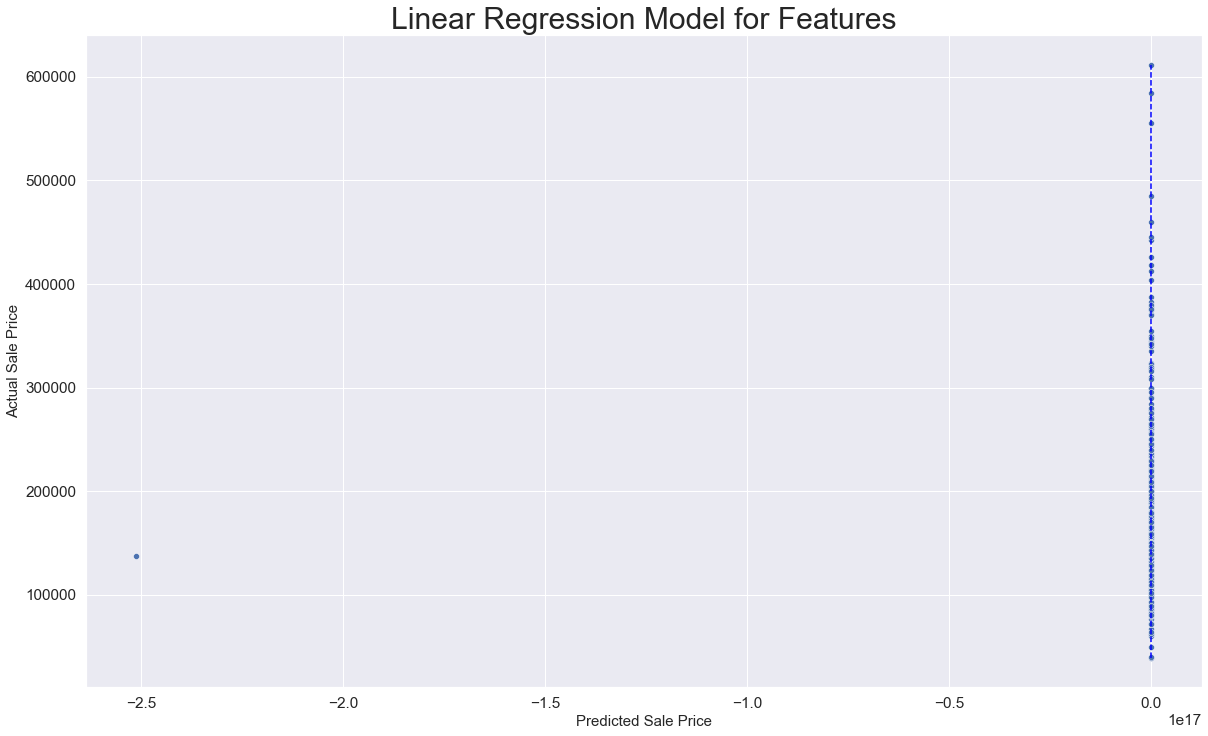

In [79]:
# Plotting the actual vs predicted price
plt.figure(figsize = (20,12))
sns.scatterplot(y_test_pred, y_test)
plt.title('Linear Regression Model for Features', fontsize=30)
plt.xlabel('Predicted Sale Price', fontsize=15)
plt.ylabel('Actual Sale Price', fontsize=15)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], c='blue', linestyle='--');

#### Summary of Linear Regression Model on all Features 
Linear Regression Mean Cross Validation Score:  -1.6857773193687462e+24  
Linear Regression Prediction score:  -6.25989292729425e+21   
RMSE Train Score:  21916.319772705298   
RMSE Test Score:  6086989950485526.0    
RMSE Percentage Difference: -27773777776524.23  

- This Linear Regression Model is quite poor and we are going to try Ridge and Lasso to see the results in comparison

# Ridge Regression on Features

In [80]:
# Create train/test splits.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#Standard Scaling
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

#Instantiate and Fit
ridge_alphas = np.logspace(0, 5, 200)
ridge = RidgeCV(alphas=ridge_alphas, cv=10)
ridge.fit(X_train, y_train)
print('Optimal alpha: ', ridge.alpha_)
optimal_ridge = Ridge(alpha=ridge.alpha_)
optimal_ridge_scores = cross_val_score(optimal_ridge, X_train, y_train, cv=10)

# Lasso Regression Cross Validation Scores
print('Ridge Regression Cross Validation Scores: ', optimal_ridge_scores)

# Mean Cross Val Score - Linear Regression Model on Training Data
print('Ridge Regression Cross Validation Mean Score: ', np.mean(optimal_ridge_scores))

# Standard Deviation Cross Val Score - Linear Regression Model on Training Data
print('Ridge Regression Cross Validation Scores Standard Deviation: ', np.std(optimal_ridge_scores))

# Fit to Optimal Lasso
optimal_ridge.fit(X_train,y_train)
y_train_pred = optimal_ridge.predict(X_train_ss)
y_test_pred = optimal_ridge.predict(X_test_ss)
    
print('Ridge Regression Prediction Score: ', optimal_ridge.score(X_test_ss, y_test))
print('RMSE Test: ', np.sqrt(mean_squared_error(y_test_pred, y_test)))
print('RMSE Train: ', np.sqrt(mean_squared_error(y_train_pred, y_train)))
perc_diff = (np.sqrt(mean_squared_error(y_train_pred, y_train)) - np.sqrt(mean_squared_error(y_test_pred, y_test)))/np.sqrt(mean_squared_error(y_train_pred, y_train)) * 100
print('RMSE Percentage Difference: ', perc_diff)

Optimal alpha:  10.71891319205128
Ridge Regression Cross Validation Scores:  [0.89538227 0.87424304 0.91308166 0.91673779 0.8787124  0.91995877
 0.91770416 0.90831332 0.90676026 0.93755007]
Ridge Regression Cross Validation Mean Score:  0.9068443744577313
Ridge Regression Cross Validation Scores Standard Deviation:  0.018323060722989285
Ridge Regression Prediction Score:  0.5091246063320135
RMSE Test:  54881.43643236193
RMSE Train:  57477.12655885713
RMSE Percentage Difference:  4.516040174411279


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


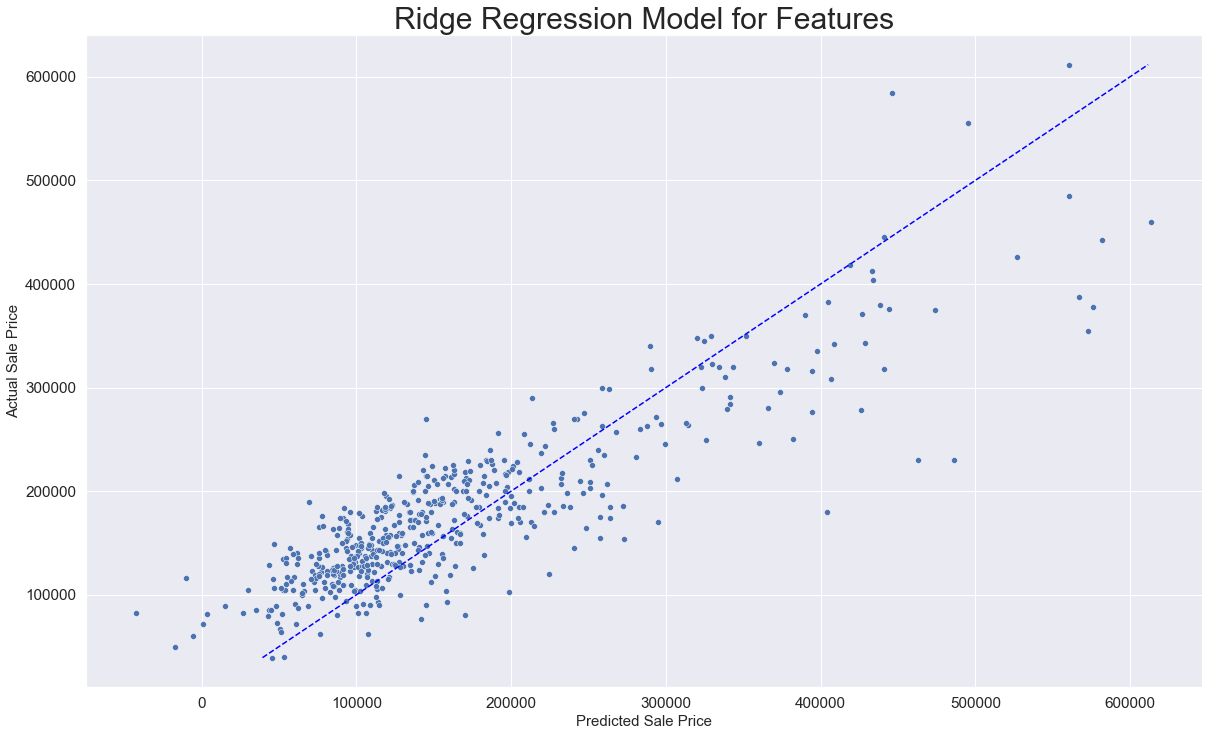

In [81]:
# Plotting the actual vs predicted price
plt.figure(figsize = (20,12))
sns.scatterplot(y_test_pred, y_test)
plt.title('Ridge Regression Model for Features', fontsize=30)
plt.xlabel('Predicted Sale Price', fontsize=15)
plt.ylabel('Actual Sale Price', fontsize=15)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], c='blue', linestyle='--');

#### Summary of Ridge Regression Model on all Features   
Ridge Regression Mean Cross Validation Score: 0.9061847796740758  
Ridge Regression Prediction score: 0.4716356199728968  
RMSE Test: 55922.412437630795    
RMSE Train: 57445.55633398657     
RMSE Percentage Difference: 2.6514564285882543  

- Although it performed better than Linear Regression, Ridge is still not very well performing

# Lasso Regression on Features

In [82]:
# Create train/test splits.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#Standard Scaling
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

#Instantiate and Fit
lasso = LassoCV(n_alphas=500, cv=10)
lasso.fit(X_train_ss, y_train)
print('Optimal alpha: ', lasso.alpha_)
optimal_lasso = Lasso(alpha=lasso.alpha_)
optimal_lasso_scores = cross_val_score(optimal_lasso, X_train, y_train, cv=10)

# Lasso Regression Cross Validation Scores
print('Lasso Regression Cross Validation Scores: ', optimal_lasso_scores)

# Mean Cross Val Score - Linear Regression Model on Training Data
print('Lasso Regression Cross Validation Mean Score: ', np.mean(optimal_lasso_scores))

# Standard Deviation Cross Val Score - Linear Regression Model on Training Data
print('Lasso Regression Cross Validation Standard Deviation Score: ', np.std(optimal_lasso_scores))

# Fit to Optimal Lasso
optimal_lasso.fit(X_train,y_train)
y_train_pred = optimal_lasso.predict(X_train_ss)
y_test_pred = optimal_lasso.predict(X_test_ss)

print('Lasso Regression Prediction Score: ', optimal_lasso.score(X_test_ss, y_test))
print('RMSE Test: ', np.sqrt(mean_squared_error(y_test_pred, y_test)))
print('RMSE Train: ', np.sqrt(mean_squared_error(y_train_pred, y_train)))
perc_diff = (np.sqrt(mean_squared_error(y_train_pred, y_train)) - np.sqrt(mean_squared_error(y_test_pred, y_test)))/np.sqrt(mean_squared_error(y_train_pred, y_train)) * 100
print('RMSE Percentage Difference: ', perc_diff)

Optimal alpha:  443.85241003322864
Lasso Regression Cross Validation Scores:  [0.88491432 0.87043933 0.91076294 0.90215486 0.87306006 0.91665383
 0.91213404 0.89910989 0.90192988 0.93341626]
Lasso Regression Cross Validation Mean Score:  0.9004575412226916
Lasso Regression Cross Validation Standard Deviation Score:  0.018685047732093
Lasso Regression Prediction Score:  0.831472267528595
RMSE Test:  32157.00011726786
RMSE Train:  32496.584116324986
RMSE Percentage Difference:  1.044983675335071


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


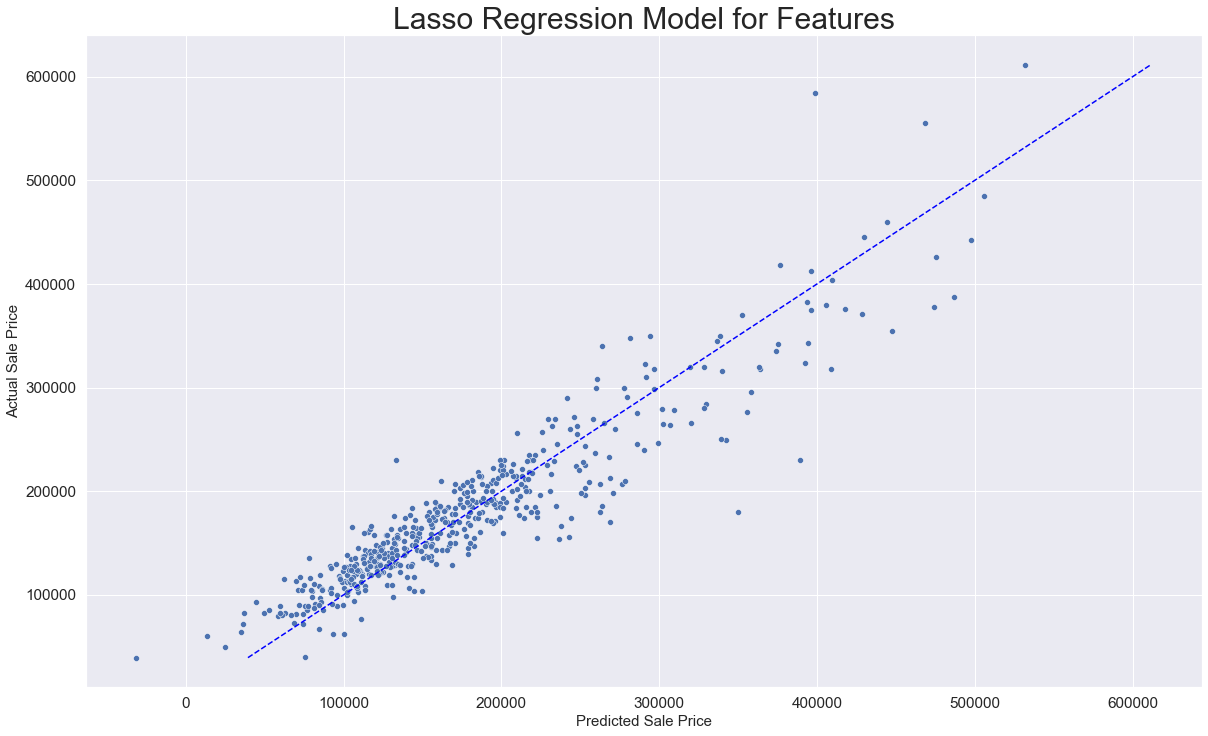

In [83]:
plt.figure(figsize = (20,12))
sns.scatterplot(y_test_pred, y_test)
plt.title('Lasso Regression Model for Features', fontsize=30)
plt.xlabel('Predicted Sale Price', fontsize=15)
plt.ylabel('Actual Sale Price', fontsize=15)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], c='blue', linestyle='--');

In [84]:
optimal_lasso_coefs = pd.DataFrame({'variable':X_train.columns,
                            'coef':optimal_lasso.coef_,
                            'abs_coef':np.abs(optimal_lasso.coef_)})
optimal_lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)
print('Percent variables zeroed out: ', np.sum((optimal_lasso.coef_ == 0))/float(X_train.shape[1]))

Percent variables zeroed out:  0.7142857142857143


In [85]:
optimal_lasso_coefs.head(50)

,variable,coef,abs_coef
20,gr_liv_area,26088.911909,26088.911909
70,neighborhood_StoneBr,17350.822323,17350.822323
130,sale_type_New,16916.660744,16916.660744
4,overall_qual,13682.807654,13682.807654
64,neighborhood_NridgHt,11888.033555,11888.033555
15,bsmtfin_sf_1,9073.890718,9073.890718
9,exter_qual,8999.185213,8999.185213
17,total_bsmt_sf,7368.469133,7368.469133
43,land_contour_HLS,6604.013390,6604.013390
111,mas_vnr_type_BrkFace,-6221.803939,6221.803939


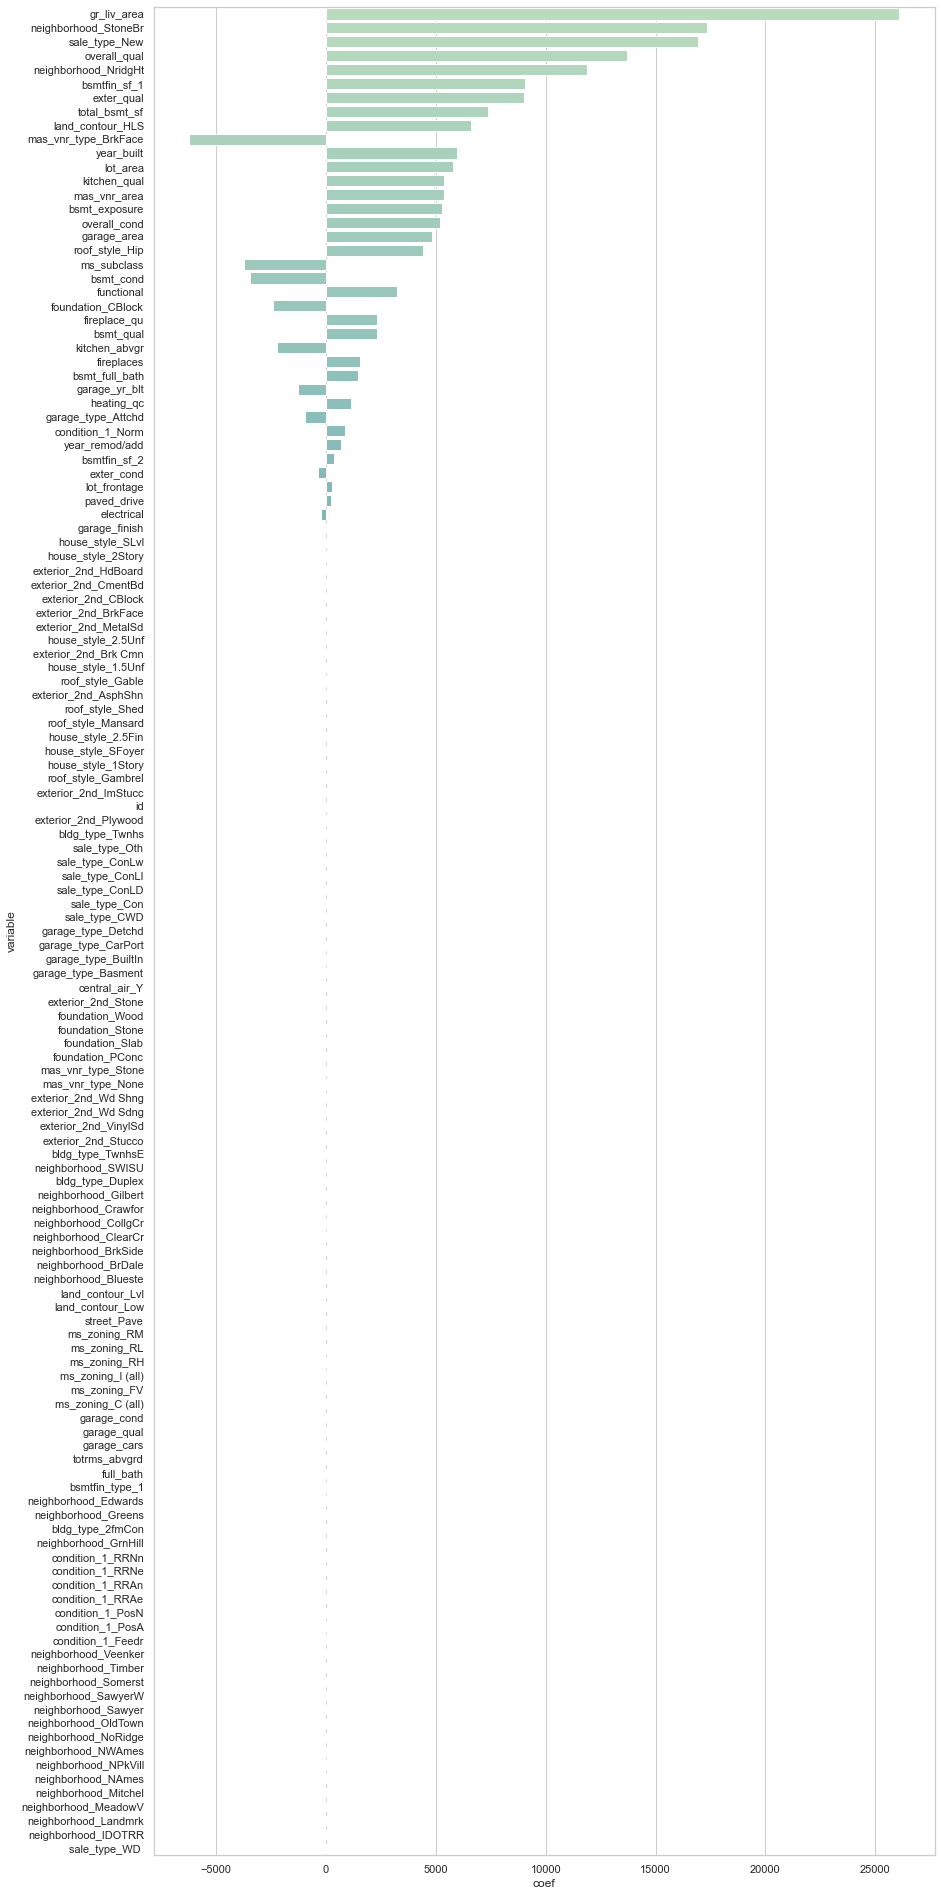

In [86]:
#Visualising the Optimal Lasso Coefficients Above
sns.set(style='whitegrid',rc={"figure.figsize": (14, 34)})
sns.barplot(y='variable',x='coef', data=optimal_lasso_coefs, palette='GnBu_d');

#### Summary of Lasso Regression Model on all Features   
Lasso Regression Mean Cross Validation Score: **0.9006197910242781**  
Lasso Regression Prediction score: **0.8174115734014809**  
RMSE Test: **32874.2425744572**     
RMSE Train: **32884.14253295223**       
RMSE Percentage Difference: **0.03010556983539523**

- The Lasso Regression Model on all Features performs vastly better than Ridge and Linear Regression Models   

# ElasticNet Regression on Features

In [87]:
# Create train/test splits.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#Standard Scaling
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

#Instantiate and Fit
l1_ratios = np.linspace(0.01, 1.0, 25)
enet_model = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=100, cv=10)
enet_model.fit(X_train, y_train)
print('Optimal Alpha: ', enet_model.alpha_)
print('Optimal l1 Ratio: ', enet_model.l1_ratio_)
optimal_enet = ElasticNet(alpha=enet_model.alpha_, l1_ratio=enet_model.l1_ratio_)
optimal_enet_scores = cross_val_score(optimal_enet, X_train, y_train, cv=10)

# Lasso Regression Cross Validation Scores
print('ElasticNet Regression Cross Validation Scores: ', optimal_enet_scores)

# Mean Cross Val Score - Linear Regression Model on Training Data
print('ElasticNet Regression Cross Validation Mean Score: ', np.mean(optimal_enet_scores))

# Standard Deviation Cross Val Score - Linear Regression Model on Training Data
print('ElasticNet Regression Cross Validation Standard Deviation Score: ', np.std(optimal_enet_scores))

# Fit to Optimal Lasso
optimal_enet.fit(X_train,y_train)
y_train_pred = optimal_enet.predict(X_train_ss)
y_test_pred = optimal_enet.predict(X_test_ss)

print('ElasticNet Regression Prediction Score: ', optimal_enet.score(X_test_ss, y_test))
print('RMSE Test: ', np.sqrt(mean_squared_error(y_test_pred, y_test)))
print('RMSE Train: ', np.sqrt(mean_squared_error(y_train_pred, y_train)))
perc_diff = (np.sqrt(mean_squared_error(y_train_pred, y_train)) - np.sqrt(mean_squared_error(y_test_pred, y_test)))/np.sqrt(mean_squared_error(y_train_pred, y_train)) * 100
print('RMSE Percentage Difference: ', perc_diff)

Optimal Alpha:  64.71756282011734
Optimal l1 Ratio:  1.0
ElasticNet Regression Cross Validation Scores:  [0.89515018 0.87156105 0.91215519 0.91691775 0.88025205 0.92134651
 0.91973145 0.90860967 0.90642892 0.93911275]
ElasticNet Regression Cross Validation Mean Score:  0.9071265506474493
ElasticNet Regression Cross Validation Standard Deviation Score:  0.01907518340042747
ElasticNet Regression Prediction Score:  0.35411905893843765
RMSE Test:  62952.94812619881
RMSE Train:  63893.40240329905
RMSE Percentage Difference:  1.4719114051307416


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


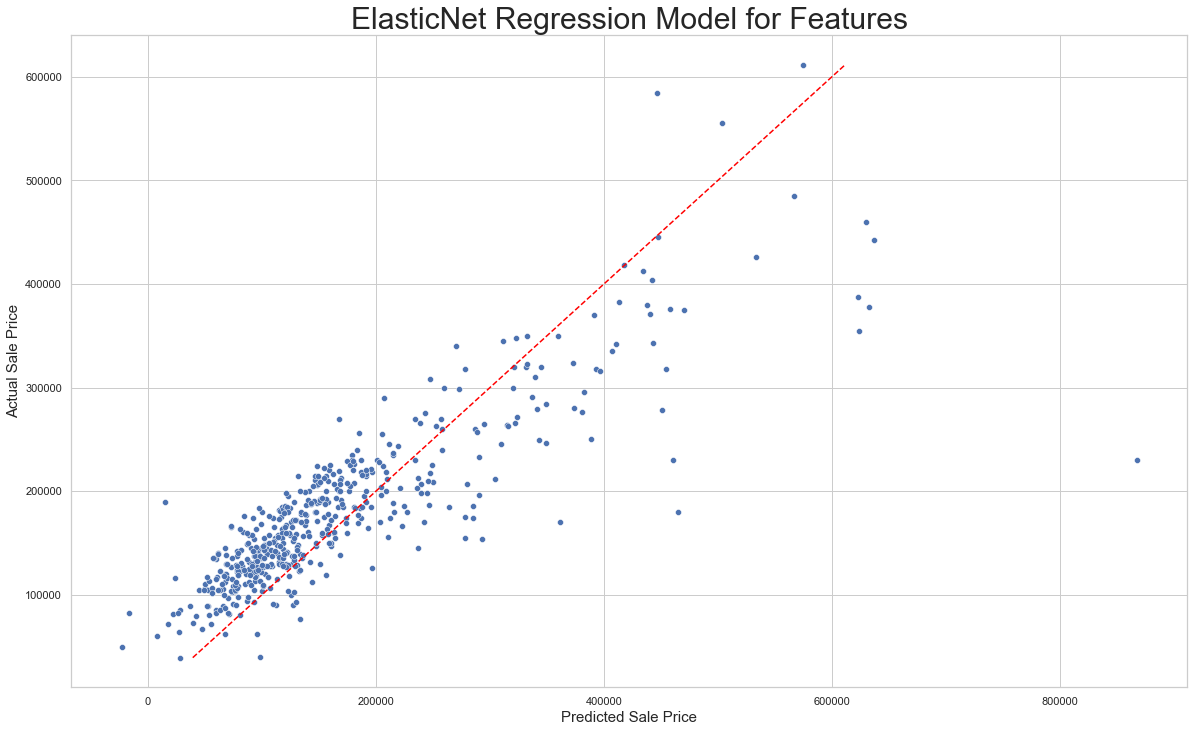

In [88]:
plt.figure(figsize = (20,12))
sns.scatterplot(y_test_pred, y_test)
plt.title('ElasticNet Regression Model for Features', fontsize=30)
plt.xlabel('Predicted Sale Price', fontsize=15)
plt.ylabel('Actual Sale Price', fontsize=15)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], c='red', linestyle='--');

### Summation of Above Regression Model Scores on all Features

**Linear Regression on all Features**   
Linear Regression Mean Cross Validation Score: -1.6857773193687462e+24  
Linear Regression Prediction score: -6.25989292729425e+21  
RMSE Train Score: 21916.319772705298  
RMSE Test Score: 6086989950485526.0  
RMSE Percentage Difference: -27773777776524.23  

**Ridge Regression Model on all Features**  
Ridge Regression Mean Cross Validation Score: 0.9061847796740758  
Ridge Regression Prediction score: 0.4716356199728968  
RMSE Test: 55922.412437630795  
RMSE Train: 57445.55633398657  
RMSE Percentage Difference: 2.6514564285882543  

**Lasso Regression Model on all Features**  
Lasso Regression Mean Cross Validation Score: 0.9006197910242781  
Lasso Regression Prediction score: 0.8174115734014809  
RMSE Test: **32874.2425744572**  
RMSE Train: 32884.14253295223  
RMSE Percentage Difference: 0.03010556983539523  

**ElasticNet Regression Model on all Features**  
ElasticNet Regression Mean Cross Validation Score:  0.9060054517905897  
ElasticNet Regression Cross Validation Standard Deviation Score:  0.020554615471608063  
ElasticNet Regression Prediction Score:  0.1785469110911817  
RMSE Test:  69728.53099799852  
RMSE Train:  64742.96603027398  
RMSE Percentage Difference:  -7.700550767774951  

- Recall our baseline RMSE score from Linear Regression with purely numeric variables was 25238, from above we can see our best RSME score is 32874.2425744572, we wil try to do further Feature Engineering to lower the RMSE score

# Further Feature Engineering 

In [89]:
train_features.columns

Index(['id', 'ms_subclass', 'lot_frontage', 'lot_area', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'mas_vnr_area',
       'exter_qual',
       ...
       'garage_type_Detchd', 'sale_type_CWD', 'sale_type_Con',
       'sale_type_ConLD', 'sale_type_ConLI', 'sale_type_ConLw',
       'sale_type_New', 'sale_type_Oth', 'sale_type_WD ', 'saleprice'],
      dtype='object', length=134)

**mmary of what has been happening so far**

**Variables chosen as of now**  
  
- **Numerical**: 'lot_frontage', 'lot_area', 'overall_qual', 'overall_cond',       'year_built', 'year_remod/add', 'mas_vnr_area', 'bsmtfin_sf_1',       'bsmtfin_sf_2', 'bsmt_unf_sf', total_bsmt_sf', '1st_flr_sf',       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',       'kitchen_abvgr', 'totrms_abvgrd', 'fireplaces', 'garage_cars',       'garage_area', 'wood_deck_sf', 'open_porch_sf', 'enclosed_porch',       '3ssn_porch', 'screen_porch', 'pool_area', 'misc_val', 'mo_sold',       'yr_sold'    

        
- **Ordinals Converted**: 'ms_subclass', 'ms_zoning', 'street', 'lot_shape', 'land_contour',       'utilities', 'lot_config', 'land_slope', 'neighborhood', 'condition_1',       'condition_2', 'bldg_type', 'house_style', 'roof_style', 'roof_matl',       'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 'exter_qual',       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',       'bsmtfin_type_1', 'bsmtfin_type_2', 'heating', 'heating_qc',       'central_air', 'electrical', 'kitchen_qual', 'functional',       'fireplace_qu', 'garage_type', 'garage_yr_blt', 'garage_finish',       'garage_qual', 'garage_cond', 'paved_drive', 'fence','sale_type'      

       
- **Nominal variables(get dummies conversion)**: 'ms_zoning', 'street', 'land_contour', 'neighborhood', 'condition_1',       'bldg_type', 'house_style', 'roof_style', 'exterior_2nd',       'mas_vnr_type', 'foundation', 'central_air', 'garage_type',       'sale_type'    


- Best RSME score is **32874.2425744572 from Lasso Regression of all features combined**
- By separating numeric and categorical variables, we had a better baseline Linear Regression Model RMSE score with numeric alone between predicted and actual housing sale prices. However, we will try to reduce the combined features further to see which features are most pertinent to predicting sale price

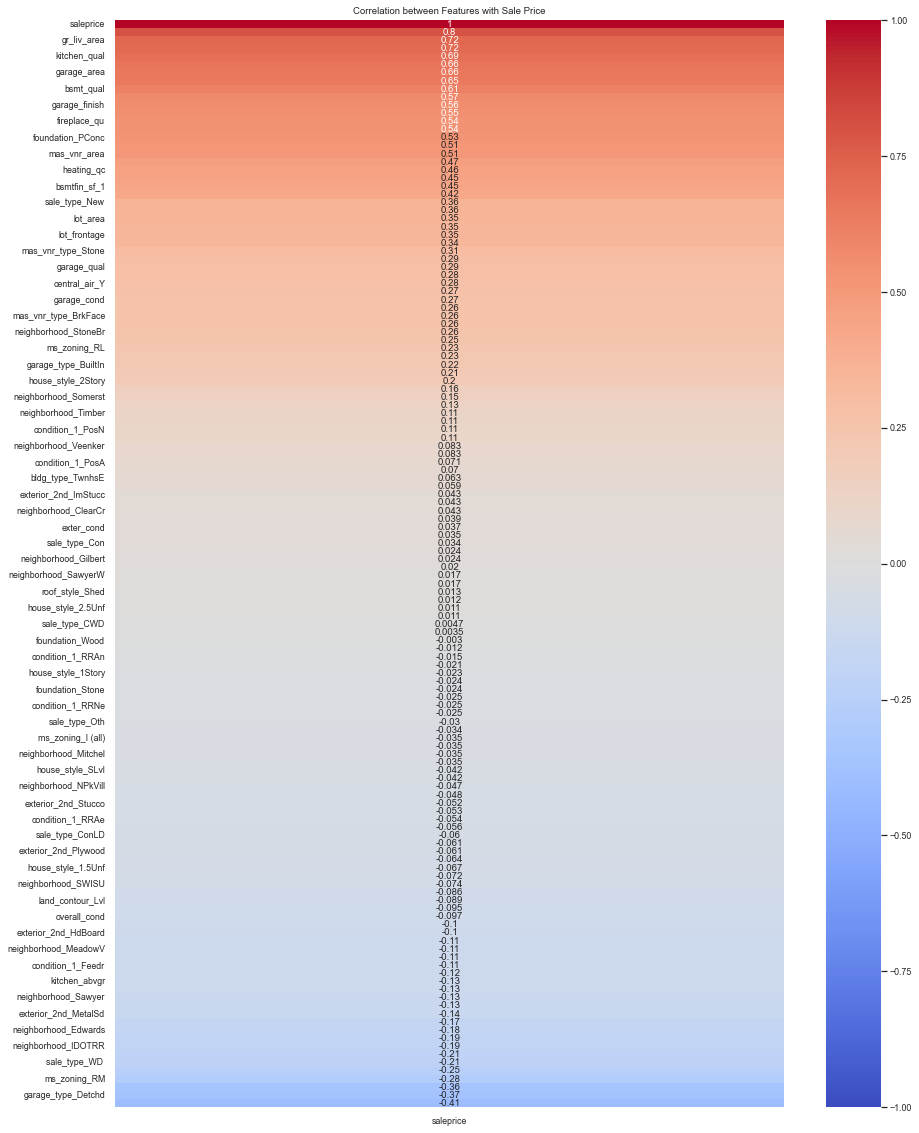

In [90]:
# Correlation Heatmap on Training Data with all Features

train_corr = train_features.corr()

plt.figure(figsize=(15,20))
sns.set(font_scale=0.8)
sns.heatmap(train_corr[['saleprice']].sort_values(by=['saleprice'], ascending=False),
            vmin=-1,
            cmap='coolwarm',
            annot=True)
plt.title('Correlation between Features with Sale Price');

In [91]:
train_features.head()

,id,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_sf_2,total_bsmt_sf,heating_qc,electrical,gr_liv_area,bsmt_full_bath,full_bath,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,street_Pave,land_contour_HLS,land_contour_Low,land_contour_Lvl,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition_1_Feedr,condition_1_Norm,condition_1_PosA,condition_1_PosN,condition_1_RRAe,condition_1_RRAn,condition_1_RRNe,condition_1_RRNn,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Plywood,exterior_2nd_Stone,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,mas_vnr_type_BrkFace,mas_vnr_type_None,mas_vnr_type_Stone,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,central_air_Y,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD,saleprice
0,-1.614734,0.068639,0.156918,0.689869,-0.075661,2.205886,0.142971,0.992443,1.114878,1.016152,-0.230598,-0.540969,0.123809,-0.580358,1.148413,0.217907,-0.291115,-0.767344,0.873803,0.285204,-0.032687,-0.817644,0.771578,-0.204881,0.731615,-0.278158,0.230136,-0.926248,-0.974251,0.235812,0.309380,0.293498,0.010372,0.272571,0.264283,0.311464,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,130500
1,-1.099511,0.068639,-1.262301,0.303456,0.627644,-0.508880,0.806032,0.612040,0.200730,1.016152,-0.230598,0.568642,0.123809,-0.580358,1.148413,0.454394,-0.291115,-0.326732,0.873803,0.285204,1.290861,1.099882,0.771578,-0.204881,0.731615,1.016114,0.230136,0.649607,0.686497,0.282199,0.309380,0.293498,0.401950,0.272571,0.264283,0.311464,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,220000
2,-1.562619,-0.864811,-0.070667,-0.377777,-0.778967,1.300964,-0.619548,1.087544,-0.567853,-0.689949,2.448795,-0.540969,0.123809,-0.580358,1.148413,0.668142,-0.291115,0.010758,-1.200401,0.285204,-0.901329,1.099882,-1.048350,-0.204881,0.731615,-0.925293,0.230136,-0.926248,-0.974251,0.185008,-0.804496,-1.014133,-1.057144,0.272571,0.264283,0.311464,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,109000
3,-1.367190,0.068639,0.167660,-0.019033,-0.778967,-0.508880,1.137562,1.087544,-0.567853,-0.689949,-0.230598,0.568642,0.123809,-0.580358,-1.2

In [92]:
# Taking a look at the top 10 features that have a high correlation with
train_features.corr()[['saleprice']].sort_values(by=['saleprice'], ascending=False).head(10)

,saleprice
saleprice,1.000000
overall_qual,0.803734
gr_liv_area,0.719602
exter_qual,0.715711
kitchen_qual,0.694259
total_bsmt_sf,0.664375
garage_area,0.655784
garage_cars,0.648945
bsmt_qual,0.613241
year_built,0.573070


# Multi-Collinearity in Garage and Basement

- We can see above the top 10 features that have a high correlation between features and sale price, however we can see total_bsmt_sf, bsmt_qual and garage_area, garage_cars are similar features describing Garage and Basement variables, let us do some exploration to see what we can do to address multi-collinearity

## Garage Area and Garage Cars

### Visualise Garage Area Distribution and Sale Price by Garage Area

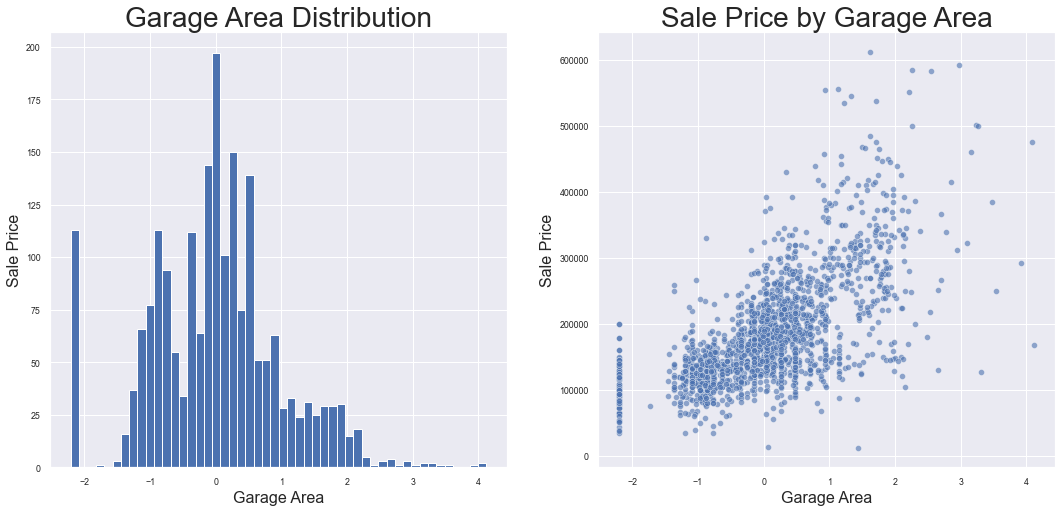

In [93]:
fig, ax = plt.subplots(ncols=2, figsize=(18,8))
ax = ax.ravel()
ax[0].hist(train_features['garage_area'],bins=50)
ax[1].scatter(train_features['garage_area'],train['saleprice'],alpha=0.6,edgecolors='white',linewidths=0.5)
ax[1].set_ylabel('Sale Price', fontsize=16)
ax[1].set_xlabel('Garage Area', fontsize=16)
ax[0].set_ylabel('Sale Price', fontsize=16)
ax[0].set_xlabel('Garage Area', fontsize=16)
ax[0].set_title('Garage Area Distribution', fontsize=28)
ax[1].set_title('Sale Price by Garage Area', fontsize=28);

- There are a lot of houses that have 0 Garages as we can see above

### Visualise Garage Cars Distribution and Sale Price by Garage Cars

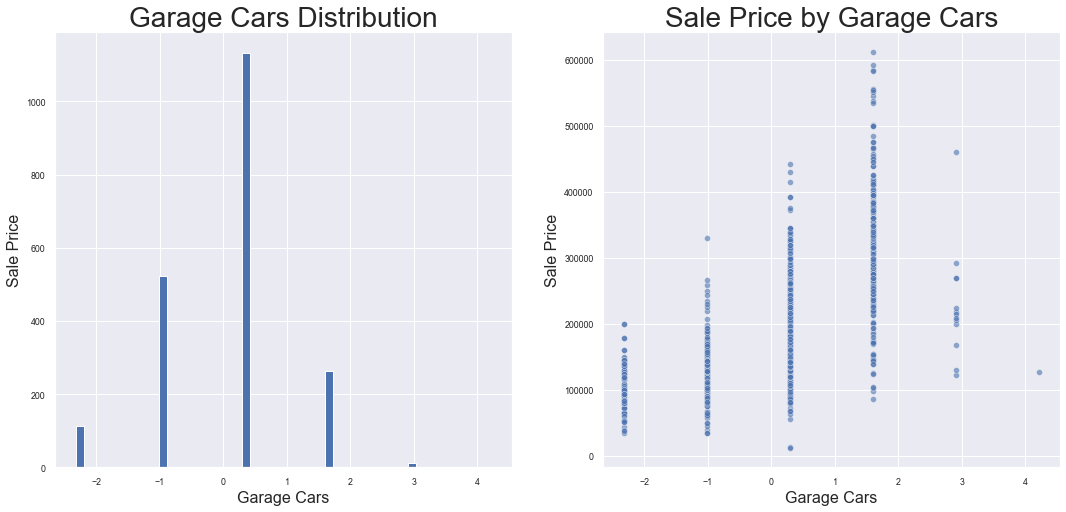

In [94]:
fig, ax = plt.subplots(ncols=2, figsize=(18,8))
ax = ax.ravel()
ax[0].hist(train_features['garage_cars'],bins=50)
ax[1].scatter(train_features['garage_cars'],train['saleprice'],alpha=0.6,edgecolors='white',linewidths=0.5)
ax[1].set_ylabel('Sale Price', fontsize=16)
ax[1].set_xlabel('Garage Cars', fontsize=16)
ax[0].set_ylabel('Sale Price', fontsize=16)
ax[0].set_xlabel('Garage Cars', fontsize=16)
ax[0].set_title('Garage Cars Distribution', fontsize=28)
ax[1].set_title('Sale Price by Garage Cars', fontsize=28);

- In comparison of Garage Cars and Garage Area, we will select Garage Area as a more relevant feature for our purposes

### Visualise Total Basement Square Feet Distribution and Sale Price by Total Basement Square Feet

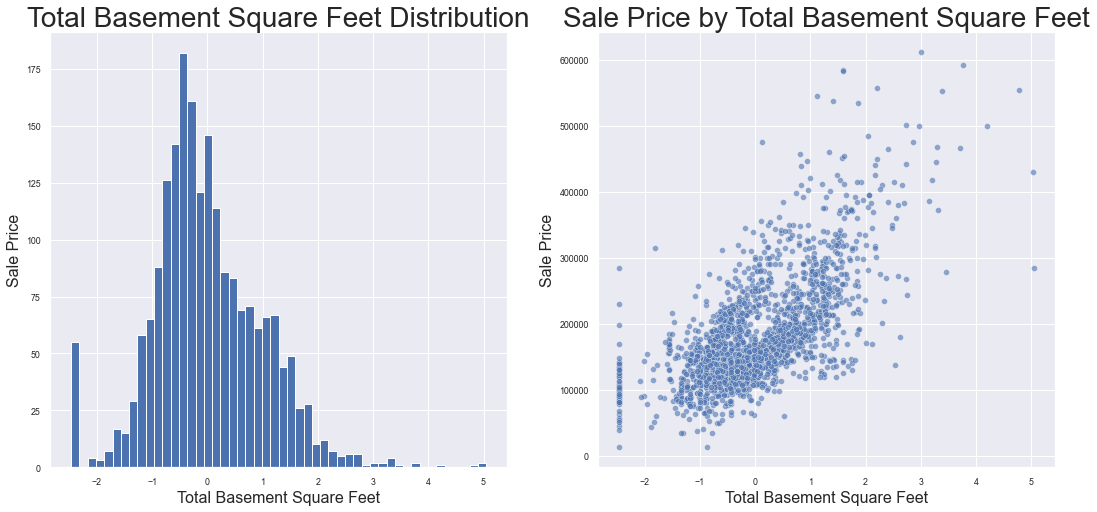

In [95]:
fig, ax = plt.subplots(ncols=2, figsize=(18,8))
ax = ax.ravel()
ax[0].hist(train_features['total_bsmt_sf'],bins=50)
ax[1].scatter(train_features['total_bsmt_sf'],train['saleprice'],alpha=0.6,edgecolors='white',linewidths=0.5)
ax[1].set_ylabel('Sale Price', fontsize=16)
ax[1].set_xlabel('Total Basement Square Feet', fontsize=16)
ax[0].set_ylabel('Sale Price', fontsize=16)
ax[0].set_xlabel('Total Basement Square Feet', fontsize=16)
ax[0].set_title('Total Basement Square Feet Distribution', fontsize=28)
ax[1].set_title('Sale Price by Total Basement Square Feet', fontsize=28);

- There are also lot of houses that have 0 Basements as we can see above but not as much as that of Garages and there are some outliers

### Visualise Basement Quality Distribution and Sale Price by Basement Quality

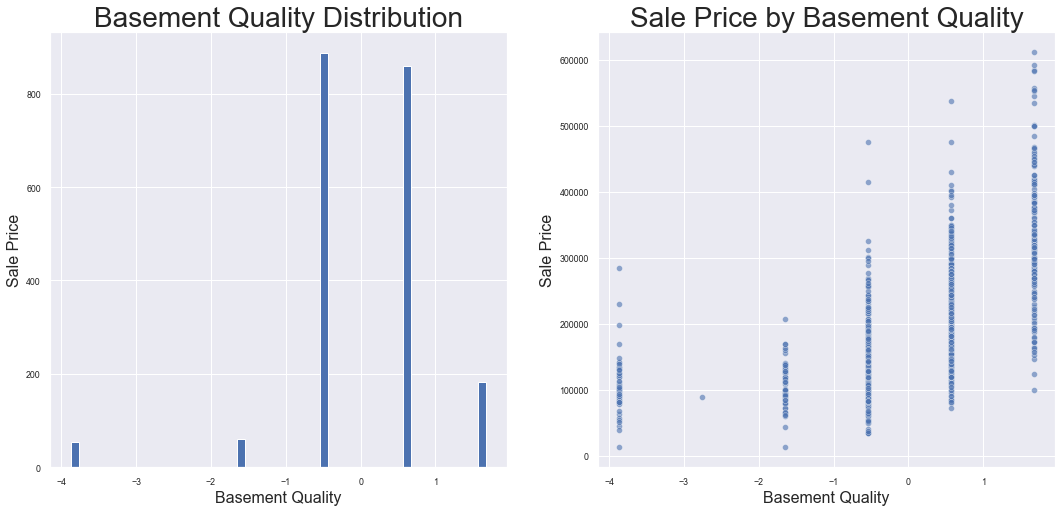

In [96]:
fig, ax = plt.subplots(ncols=2, figsize=(18,8))
ax = ax.ravel()
ax[0].hist(train_features['bsmt_qual'],bins=50)
ax[1].scatter(train_features['bsmt_qual'],train['saleprice'],alpha=0.6,edgecolors='white',linewidths=0.5)
ax[1].set_ylabel('Sale Price', fontsize=16)
ax[1].set_xlabel('Basement Quality', fontsize=16)
ax[0].set_ylabel('Sale Price', fontsize=16)
ax[0].set_xlabel('Basement Quality', fontsize=16)
ax[0].set_title('Basement Quality Distribution', fontsize=28)
ax[1].set_title('Sale Price by Basement Quality', fontsize=28);

- Total Basement Square Feet will be maintained in the selected features and basement quality will be removed in order to avoid multicollinearity and also because Total Basement Square Feet has a higher correlation with Sale Price and less number of houses with 0 Basements as compared to 0 Garages

# Isolating the 7 selected features for Train

In [97]:
train_7_features = train_features[['saleprice', 'overall_qual', 'gr_liv_area', 'exter_qual', 'kitchen_qual', 'total_bsmt_sf', 'garage_area', 'year_built']]

In [98]:
train_7_features.head()

,saleprice,overall_qual,gr_liv_area,exter_qual,kitchen_qual,total_bsmt_sf,garage_area,year_built
0,130500,-0.075661,-0.032687,1.016152,0.731615,-0.767344,0.010372,0.142971
1,220000,0.627644,1.290861,1.016152,0.731615,-0.326732,0.401950,0.806032
2,109000,-0.778967,-0.901329,-0.689949,0.731615,0.010758,-1.057144,-0.619548
3,174000,-0.778967,-0.104731,-0.689949,-0.775084,-1.566539,-0.339251,1.137562
4,138500,-0.075661,-0.102672,-0.689949,-0.775084,-0.882184,0.052327,-2.376659


# Modelling Training Data on 7 Features

### Assemble our predictor variables (X) and our target (y)

In [99]:
X = train_7_features.drop('saleprice',axis=1)
y = train_7_features['saleprice']

## Linear Regression on 7 Features

In [100]:
# Create train/test splits.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#Standard Scaling
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

#Instantiate and Fit
lr = LinearRegression()
lr.fit(X_train_ss, y_train)


# Cross Validating Linear Regression Model on Training Data
cross_val = cross_val_score(lr, X_train_ss, y_train, cv=10)
print('Linear Regression Cross Validation Scores: ', cross_val)

# Mean Cross Val Score - Linear Regression Model on Training Data
lr_cv_mean = cross_val.mean()
print('Linear Regression Mean Cross Validation Score: ', np.mean(cross_val))

# Standard Deviation Cross Val Score - Linear Regression Model on Training Data
lr_cv_std_dev = cross_val.std()
print('Linear Regression Cross Validation Scores Standard Deviation: ', np.std(cross_val))

# Train Score
lr_train = lr.score(X_train_ss, y_train)
lr_train
print('Linear Regression Train Prediction score: ', lr_train)

# Test Score
lr_test = lr.score(X_test_ss, y_test)
print('Linear Regression Test Prediction score: ', lr_test)

y_train_pred = lr.predict(X_train_ss)
y_test_pred = lr.predict(X_test_ss)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
perc_diff = (mse_train - mse_test)/mse_train * 100
print(mse_train, mse_test, str(perc_diff)+"%")
print('MSE Train Score: ', mse_train)
print('MSE Test Score: ', mse_test)
print('MSE Percentage Difference: ', perc_diff)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
perc_diff = (rmse_train - rmse_test)/rmse_train * 100
print(mse_train, mse_test, str(perc_diff)+"%")
print('RMSE Train Score: ', rmse_train)
print('RMSE Test Score: ', rmse_test)
print('RMSE Percentage Difference: ', perc_diff)

Linear Regression Cross Validation Scores:  [0.83171759 0.8110603  0.85883689 0.83395488 0.83835003 0.84835942
 0.84569926 0.8361789  0.84414302 0.87594517]
Linear Regression Mean Cross Validation Score:  0.8424245465599846
Linear Regression Cross Validation Scores Standard Deviation:  0.01633277842216232
Linear Regression Train Prediction score:  0.8451913108465846
Linear Regression Test Prediction score:  0.8306975585959064
979120591.985387 1038826208.4489673 -6.097881808666062%
MSE Train Score:  979120591.985387
MSE Test Score:  1038826208.4489673
MSE Percentage Difference:  -6.097881808666062
979120591.985387 1038826208.4489673 -3.0038260496502414%
RMSE Train Score:  31290.90270326804
RMSE Test Score:  32230.826989839516
RMSE Percentage Difference:  -3.0038260496502414


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


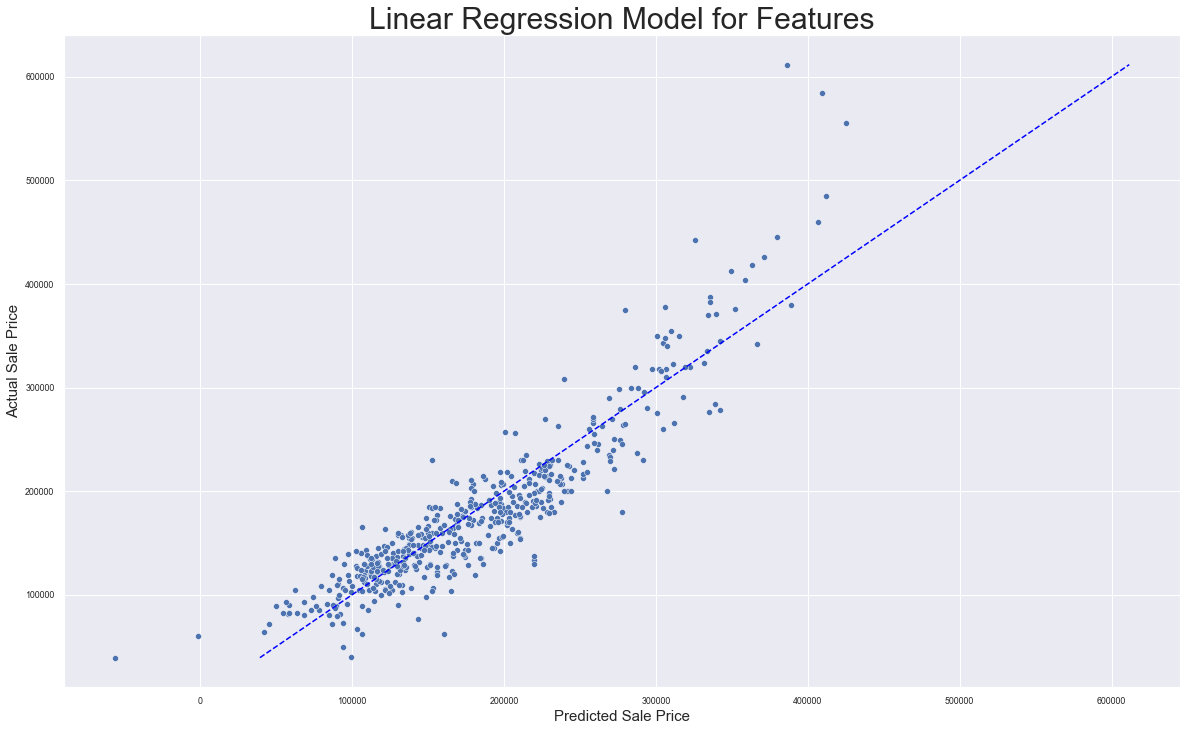

In [101]:
# Plotting the actual vs predicted price
plt.figure(figsize = (20,12))
sns.scatterplot(y_test_pred, y_test)
plt.title('Linear Regression Model for Features', fontsize=30)
plt.xlabel('Predicted Sale Price', fontsize=15)
plt.ylabel('Actual Sale Price', fontsize=15)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], c='blue', linestyle='--');

**Linear Regression on 7 Features**   
Linear Regression Mean Cross Validation Score: 0.8434257316567771   
Linear Regression Prediction score: 0.8277915645259164    
RMSE Train Score: 31412.637986684997  
RMSE Test Score:  **31926.13479127656**  
RMSE Percentage Difference: -1.6346822091453157  

- We can see the Linear Regression model with 7 features performs vastly better

## Ridge Regression on 7 Features

In [102]:
# Create train/test splits.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#Standard Scaling
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

#Instantiate and Fit
ridge_alphas = np.logspace(0, 5, 200)
ridge = RidgeCV(alphas=ridge_alphas, cv=10)
ridge.fit(X_train, y_train)
print('Optimal alpha: ', ridge.alpha_)
optimal_ridge = Ridge(alpha=ridge.alpha_)
optimal_ridge_scores = cross_val_score(optimal_ridge, X_train, y_train, cv=10)

# Lasso Regression Cross Validation Scores
print('Ridge Regression Cross Validation Scores: ', optimal_ridge_scores)

# Mean Cross Val Score - Linear Regression Model on Training Data
print('Ridge Regression Cross Validation Mean Score: ', np.mean(optimal_ridge_scores))

# Standard Deviation Cross Val Score - Linear Regression Model on Training Data
print('Ridge Regression Cross Validation Scores Standard Deviation: ', np.std(optimal_ridge_scores))

# Fit to Optimal Lasso
optimal_ridge.fit(X_train,y_train)
y_train_pred = optimal_ridge.predict(X_train_ss)
y_test_pred = optimal_ridge.predict(X_test_ss)
    
print('Ridge Regression Prediction Score: ', optimal_ridge.score(X_test_ss, y_test))
print('RMSE Test: ', np.sqrt(mean_squared_error(y_test_pred, y_test)))
print('RMSE Train: ', np.sqrt(mean_squared_error(y_train_pred, y_train)))
perc_diff = (np.sqrt(mean_squared_error(y_train_pred, y_train)) - np.sqrt(mean_squared_error(y_test_pred, y_test)))/np.sqrt(mean_squared_error(y_train_pred, y_train)) * 100
print('RMSE Percentage Difference: ', perc_diff)

Optimal alpha:  36.12342699709432
Ridge Regression Cross Validation Scores:  [0.83334496 0.81149437 0.85865204 0.83307642 0.84030925 0.84749602
 0.84529029 0.83454849 0.84437458 0.87660289]
Ridge Regression Cross Validation Mean Score:  0.8425189320182804
Ridge Regression Cross Validation Scores Standard Deviation:  0.016316082092615473
Ridge Regression Prediction Score:  0.8314791496357039
RMSE Test:  32156.34351857258
RMSE Train:  31304.14794255291
RMSE Percentage Difference:  -2.722308805796459


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


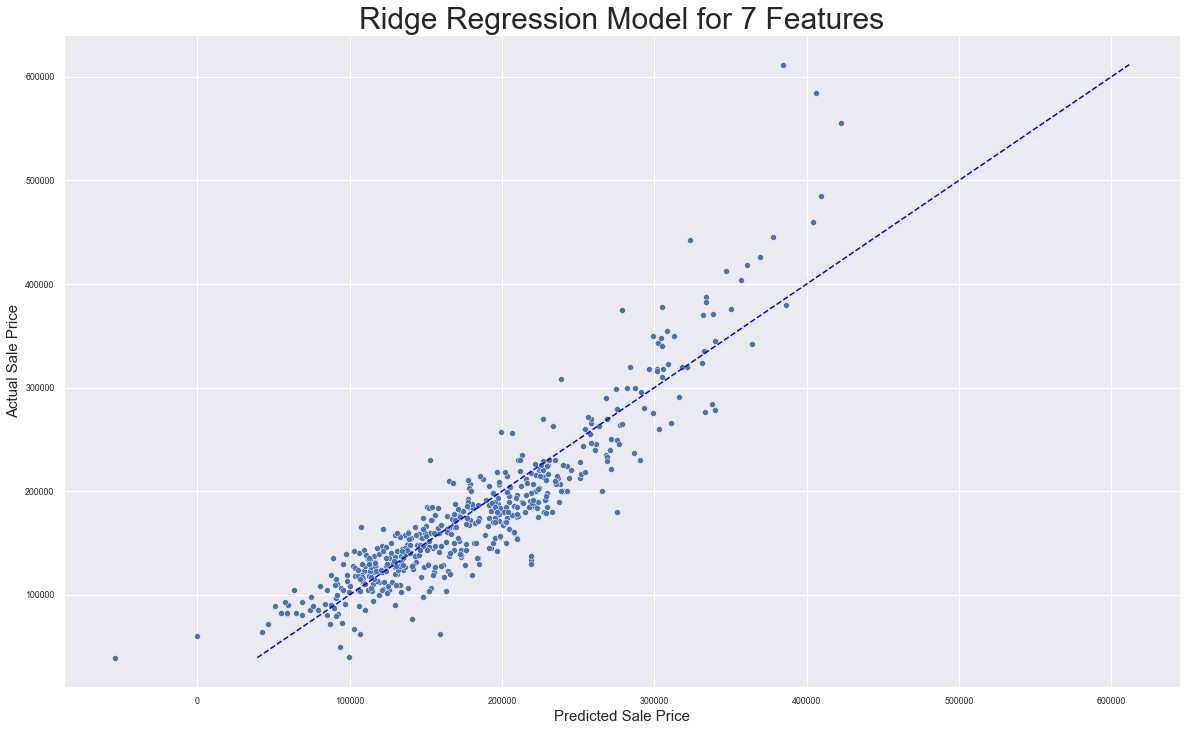

In [103]:
# Plotting the actual vs predicted price
plt.figure(figsize = (20,12))
sns.scatterplot(y_test_pred, y_test)
plt.title('Ridge Regression Model for 7 Features', fontsize=30)
plt.xlabel('Predicted Sale Price', fontsize=15)
plt.ylabel('Actual Sale Price', fontsize=15)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], c='blue', linestyle='--');

**Ridge Regression Model on all Features**  
Ridge Regression Mean Cross Validation Score: 0.84349918668316  
Ridge Regression Prediction score:  0.8292381940205933  
RMSE Test:  **31791.75492759391**  
RMSE Train: 31440.315129399798  
RMSE Percentage Difference: **-1.1177998590271132**  

- Ridge Regression model with 7 features performs even better than Linear Regression Model with 7 features (although slightly)

## Lasso Regression on 7 Features

In [104]:
# Create train/test splits.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#Standard Scaling
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

#Instantiate and Fit
lasso = LassoCV(n_alphas=500, cv=10)
lasso.fit(X_train_ss, y_train)
print('Optimal alpha: ', lasso.alpha_)
optimal_lasso = Lasso(alpha=lasso.alpha_)
optimal_lasso_scores = cross_val_score(optimal_lasso, X_train, y_train, cv=10)

# Lasso Regression Cross Validation Scores
print('Lasso Regression Cross Validation Scores: ', optimal_lasso_scores)

# Mean Cross Val Score - Linear Regression Model on Training Data
print('Lasso Regression Cross Validation Mean Score: ', np.mean(optimal_lasso_scores))

# Standard Deviation Cross Val Score - Linear Regression Model on Training Data
print('Lasso Regression Cross Validation Standard Deviation Score: ', np.std(optimal_lasso_scores))

# Fit to Optimal Lasso
optimal_lasso.fit(X_train,y_train)
y_train_pred = optimal_lasso.predict(X_train_ss)
y_test_pred = optimal_lasso.predict(X_test_ss)

print('Lasso Regression Prediction Score: ', optimal_lasso.score(X_test_ss, y_test))
print('RMSE Test: ', np.sqrt(mean_squared_error(y_test_pred, y_test)))
print('RMSE Train: ', np.sqrt(mean_squared_error(y_train_pred, y_train)))
perc_diff = (np.sqrt(mean_squared_error(y_train_pred, y_train)) - np.sqrt(mean_squared_error(y_test_pred, y_test)))/np.sqrt(mean_squared_error(y_train_pred, y_train)) * 100
print('RMSE Percentage Difference: ', perc_diff)

Optimal alpha:  63.907998396542716
Lasso Regression Cross Validation Scores:  [0.83187749 0.81096684 0.85880022 0.83392609 0.83850056 0.84832158
 0.84566735 0.83596711 0.84426864 0.87600086]
Lasso Regression Cross Validation Mean Score:  0.8424296749560197
Lasso Regression Cross Validation Standard Deviation Score:  0.016353500963616388
Lasso Regression Prediction Score:  0.8310650934691948
RMSE Test:  32195.82339263332
RMSE Train:  31295.28523797278
RMSE Percentage Difference:  -2.877552154622486


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


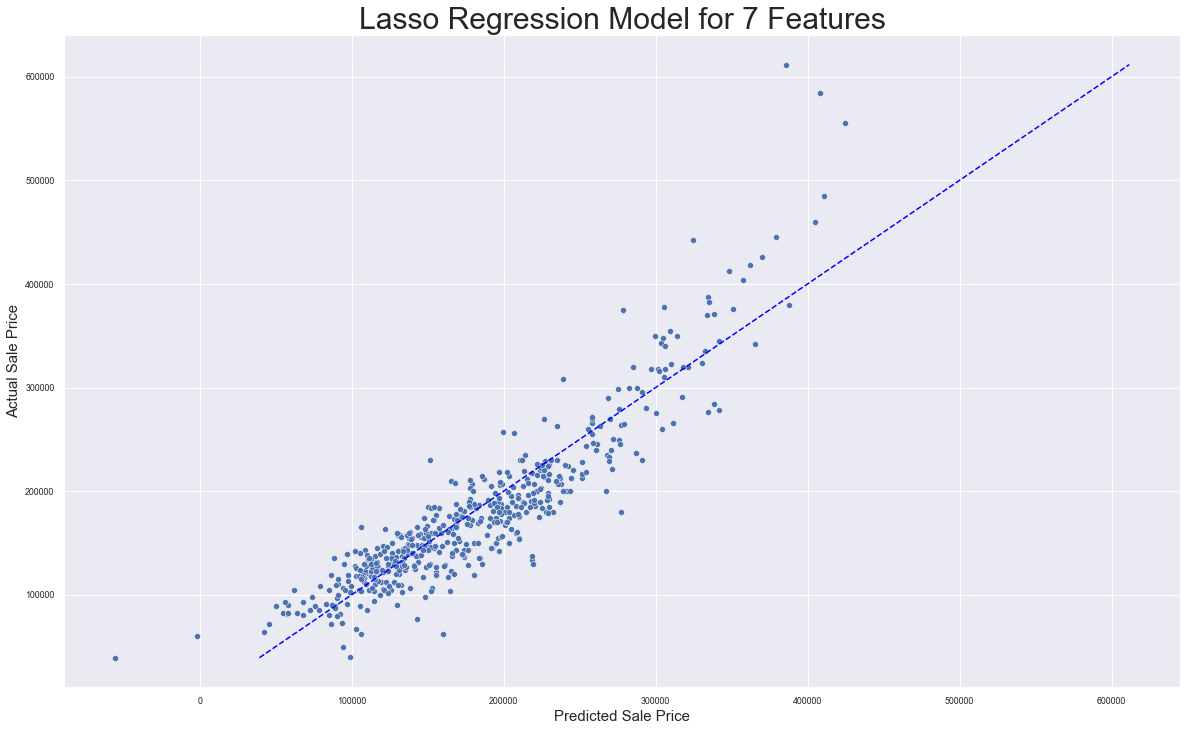

In [105]:
plt.figure(figsize = (20,12))
sns.scatterplot(y_test_pred, y_test)
plt.title('Lasso Regression Model for 7 Features', fontsize=30)
plt.xlabel('Predicted Sale Price', fontsize=15)
plt.ylabel('Actual Sale Price', fontsize=15)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], c='blue', linestyle='--');

**Lasso Regression Model on all Features**  
Lasso Regression Mean Cross Validation Score: 0.8434320241585735    
Lasso Regression Prediction score: 0.8285145286787599  
RMSE Test: **31859.04827775226**    
RMSE Train: 31429.89211107945  
RMSE Percentage Difference: -1.3654395158471615  

- The RMSE for Lasso is higher than that of Linear and Ridge Regression for 7 features

In [106]:
optimal_lasso_coefs = pd.DataFrame({'variable':X_train.columns,
                            'coef':optimal_lasso.coef_,
                            'abs_coef':np.abs(optimal_lasso.coef_)})
optimal_lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)
print('Percent variables zeroed out: ', np.sum((optimal_lasso.coef_ == 0))/float(X_train.shape[1]))

Percent variables zeroed out:  0.0


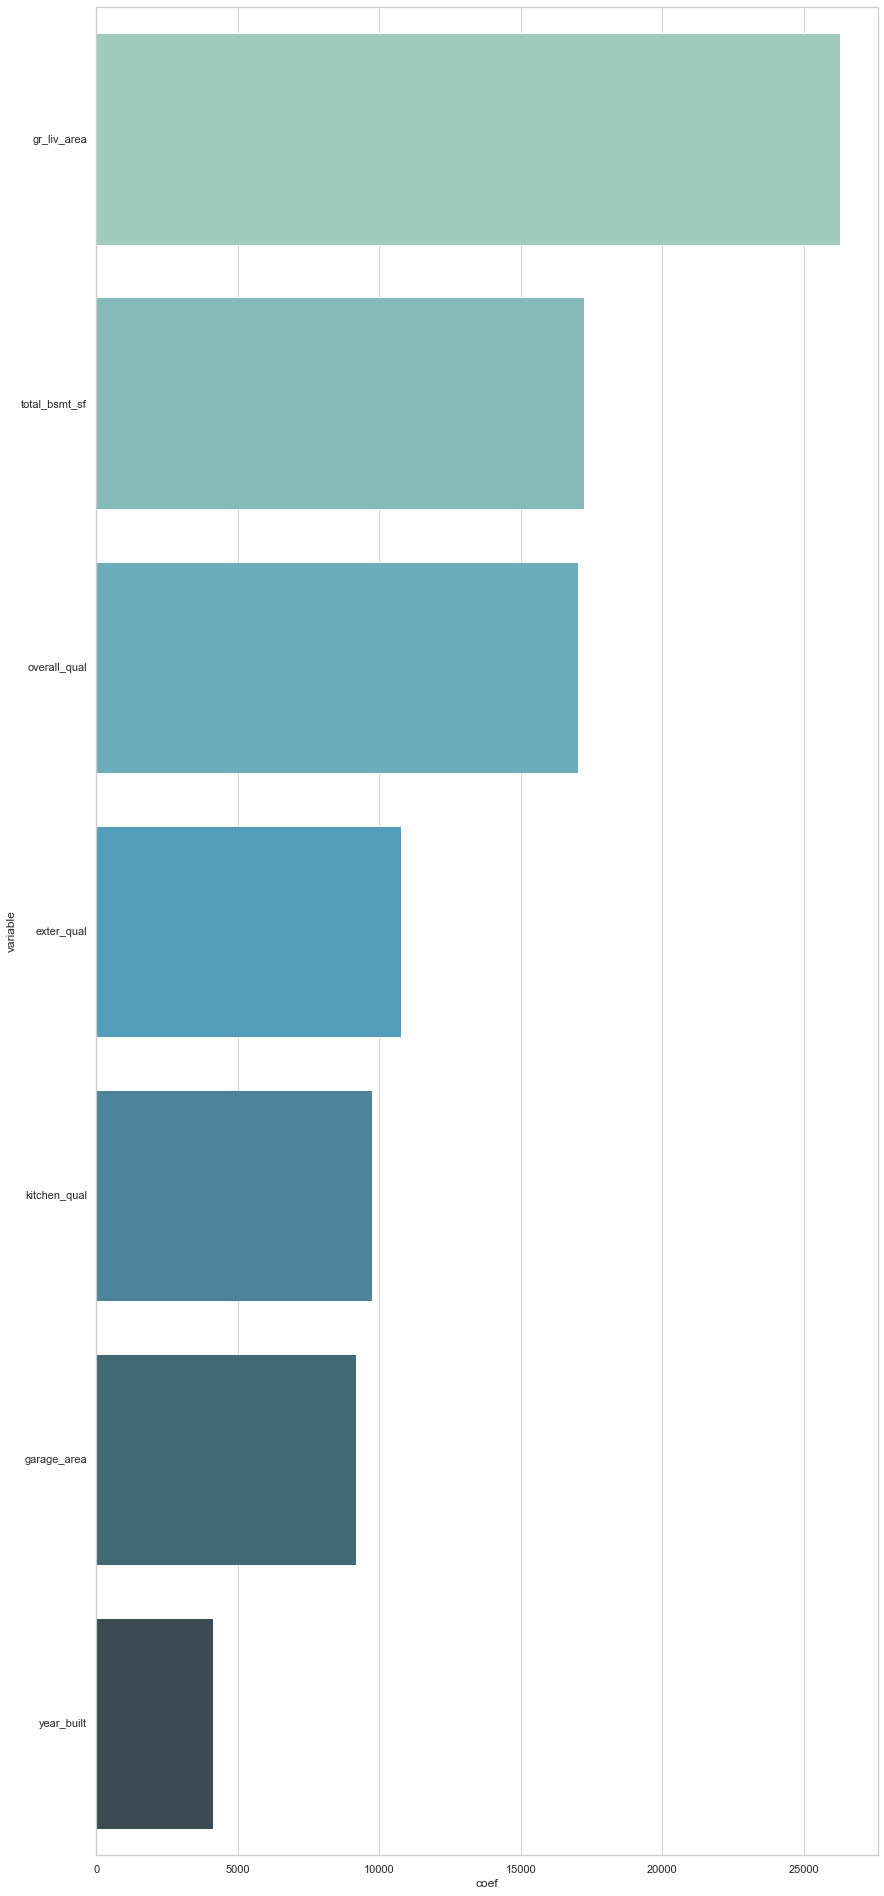

In [107]:
#Visualising the Optimal Lasso Coefficients Above
sns.set(style='whitegrid',rc={"figure.figsize": (14, 34)})
sns.barplot(y='variable',x='coef', data=optimal_lasso_coefs, palette='GnBu_d');

- None of the coefficients were zeroed out by Lasso Regression

## ElasticNet Regression on 7 Features

In [108]:
# Create train/test splits.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#Standard Scaling
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

#Instantiate and Fit
l1_ratios = np.linspace(0.01, 1.0, 25)
enet_model = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=100, cv=10)
enet_model.fit(X_train, y_train)
print('Optimal Alpha: ', enet_model.alpha_)
print('Optimal l1 Ratio: ', enet_model.l1_ratio_)
optimal_enet = ElasticNet(alpha=enet_model.alpha_, l1_ratio=enet_model.l1_ratio_)
optimal_enet_scores = cross_val_score(optimal_enet, X_train, y_train, cv=10)

# Lasso Regression Cross Validation Scores
print('ElasticNet Regression Cross Validation Scores: ', optimal_enet_scores)

# Mean Cross Val Score - Linear Regression Model on Training Data
print('ElasticNet Regression Cross Validation Mean Score: ', np.mean(optimal_enet_scores))

# Standard Deviation Cross Val Score - Linear Regression Model on Training Data
print('ElasticNet Regression Cross Validation Standard Deviation Score: ', np.std(optimal_enet_scores))

# Fit to Optimal Lasso
optimal_enet.fit(X_train,y_train)
y_train_pred = optimal_enet.predict(X_train_ss)
y_test_pred = optimal_enet.predict(X_test_ss)

print('ElasticNet Regression Prediction Score: ', optimal_enet.score(X_test_ss, y_test))
print('RMSE Test: ', np.sqrt(mean_squared_error(y_test_pred, y_test)))
print('RMSE Train: ', np.sqrt(mean_squared_error(y_train_pred, y_train)))
perc_diff = (np.sqrt(mean_squared_error(y_train_pred, y_train)) - np.sqrt(mean_squared_error(y_test_pred, y_test)))/np.sqrt(mean_squared_error(y_train_pred, y_train)) * 100
print('RMSE Percentage Difference: ', perc_diff)

Optimal Alpha:  64.71756282011734
Optimal l1 Ratio:  1.0
ElasticNet Regression Cross Validation Scores:  [0.83187957 0.81096562 0.85879969 0.8339257  0.83850248 0.84832111
 0.84566695 0.83596439 0.84427024 0.87600154]
ElasticNet Regression Cross Validation Mean Score:  0.8424297293959585
ElasticNet Regression Cross Validation Standard Deviation Score:  0.01635376341059304
ElasticNet Regression Prediction Score:  0.8310651292833899
RMSE Test:  32195.819979876334
RMSE Train:  31295.29166335346
RMSE Percentage Difference:  -2.8775201273403925


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


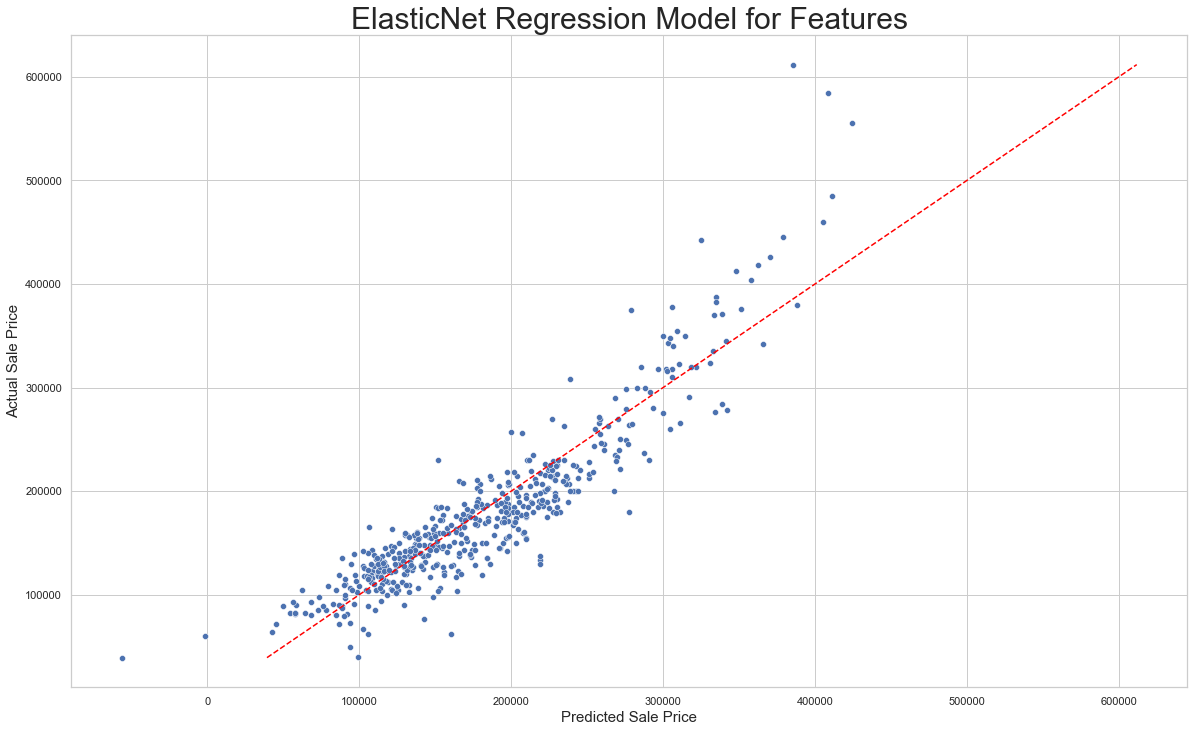

In [109]:
plt.figure(figsize = (20,12))
sns.scatterplot(y_test_pred, y_test)
plt.title('ElasticNet Regression Model for Features', fontsize=30)
plt.xlabel('Predicted Sale Price', fontsize=15)
plt.ylabel('Actual Sale Price', fontsize=15)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], c='red', linestyle='--');

**ElasticNet Regression Model on all Features**    
ElasticNet Regression Mean Cross Validation Score:0.8434320738745406  
ElasticNet Regression Prediction Score: 0.8285148491959493     
RMSE Test: **31859.01850445047**    
RMSE Train:  31429.90175379014   
RMSE Percentage Difference: -1.3653136876528087  

**Summary of Modelling for 7 Features Below:**  

**Linear Regression**
RMSE: 31926.13479127656, Prediction Score: 0.8277915645259164  

**Ridge Regression**
RMSE: **31791.75492759391**, Prediction Score: **0.8292381940205933** 

**Lasso Regression**
RMSE: 31859.04827775226, Prediction Score: 0.8285145286787599  

**ElasticNet Regression**
RMSE: 31859.01850445047, Prediction Score: 0.8285148491959493

- We can see that Ridge Regression provides the lowest RMSE and best Prediction score so we shall select Ridge Regression for our purposes

# Kaggle Submission

In [110]:
test_7_features = test_features[['overall_qual', 'gr_liv_area', 'exter_qual', 'kitchen_qual', 'total_bsmt_sf', 'garage_area', 'year_built']]

In [111]:
test_7_features.head()

,overall_qual,gr_liv_area,exter_qual,kitchen_qual,total_bsmt_sf,garage_area,year_built
0,-0.036625,0.851644,-0.678056,-2.280707,-0.034747,-0.142805,-1.991272
1,-0.767467,0.928691,-0.678056,-0.755604,2.257062,0.515669,0.214229
2,0.694217,-0.001807,1.109731,0.769500,-0.920493,-0.208652,1.168849
3,-0.767467,-1.044913,1.109731,-0.755604,-0.160590,0.045330,-1.563339
4,-0.036625,-0.203316,-0.678056,-0.755604,0.870361,0.205245,-0.246622


In [112]:
test_7_features.shape

(878, 7)

In [113]:
X_kaggle_test = test_7_features
X_kaggle_test.head()

,overall_qual,gr_liv_area,exter_qual,kitchen_qual,total_bsmt_sf,garage_area,year_built
0,-0.036625,0.851644,-0.678056,-2.280707,-0.034747,-0.142805,-1.991272
1,-0.767467,0.928691,-0.678056,-0.755604,2.257062,0.515669,0.214229
2,0.694217,-0.001807,1.109731,0.769500,-0.920493,-0.208652,1.168849
3,-0.767467,-1.044913,1.109731,-0.755604,-0.160590,0.045330,-1.563339
4,-0.036625,-0.203316,-0.678056,-0.755604,0.870361,0.205245,-0.246622


In [114]:
test = pd.read_csv('../project_2/datasets/test.csv')

In [115]:
test.dtypes

Id                   int64
PID                  int64
MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1         int64
BsmtFin Type 2      object
B

In [116]:
test_id = test[['Id']]

In [117]:
len(test_id)

878

In [118]:
# Predicting using Ridge Regression
kaggle_ridge_predict = pd.DataFrame(optimal_ridge.predict(X_kaggle_test), columns=["SalePrice"])
kaggle_ridge_predict.head()

,SalePrice
0,163197.225249
1,222406.389793
2,200613.578556
3,137738.629284
4,177106.576578


In [119]:
kaggle_ridge_predict.shape

(878, 1)

In [120]:
# Combining for Kaggle Score Submission
# Ridge Regression
kaggle_ridge = test_id.merge(kaggle_ridge_predict, how='inner', left_index=True, right_index=True)
kaggle_ridge.head()

,Id,SalePrice
0,2658,163197.225249
1,2718,222406.389793
2,2414,200613.578556
3,1989,137738.629284
4,625,177106.576578


In [121]:
kaggle_ridge.rename(columns = {'id':'Id'}, inplace = True)

In [122]:
kaggle_ridge.shape

(878, 2)

In [123]:
kaggle_ridge.tail(20)

,Id,SalePrice
858,2134,219854.335884
859,984,93639.831793
860,2396,326113.127331
861,1673,128340.956044
862,404,135187.390964
863,607,176313.658939
864,814,168286.858026
865,868,224816.405536
866,2271,212427.317711
867,1633,256453.082330


In [124]:
kaggle_ridge.to_csv('../project_2/datasets/kaggle_ridge.csv', index=False)

# Kaggle Score

**The Kaggle Score obtained from Ridge Regression Model was as follows:**  
Score: **28659.95804**  
Public score: **35572.26608**  
https://www.kaggle.com/competitions/dsi-us-11-project-2-regression-challenge/leaderboard  
kaggle_ridge.csv  
Submitted by Anand Ramchandani   

Compared to the Ridge Regression Score Obtained earlier from the 7 selected features
Ridge Regression RMSE: **31791.75492759391**, Prediction Score: **0.8292381940205933**

# Web Application Recommendation Website

Using the model we can upload to the following website link and upload the data for the specific feature required and the model will provide a prediction,
https://yxmauw-general-assembly-pub-project-2cloud-appapp-rr21s2.streamlitapp.com/

Website made using Streamlit, credits to team members: Maybelle and Tiek Leong

## Conclusions and Business Recommendations
- The following features appear to add the most value to a home: 'overall_qual', 'gr_liv_area', 'exter_qual', 'kitchen_qual', 'total_bsmt_sf', 'garage_area', 'year_built' 
- Lot Shape (Ordinal): General shape of property seems to hurt the value of a home the most, but generally features observed that have a highly negative correlation with Sale Price
- Homeowners could improve their homes to increase the value by increasing overall quality of the home, expanding groung living area, exterior and kitchen quality should improve, increased garage area and increased basement square feet
- Houses in Stone Brook neighborhoods seem like they might be a good investment due to high correlation with Sale Price
- This model may not generalize well to other cities, because a lot of other cities may not have garages or basements as a popular house addition
- To make it more universal we would need more data that have house features that are more popular, and also proximity to locations like malls, schools, transportation hubs would be invaluable to improving the model
- Although Ridge Regression Model was used for this project finally, it would be advantageous to try different models to see if we can achieve better prediction performance  
- We can collect data that is more recent and a wider year range historically rather than just the 4 years 2006 to 2010. This is recommended because we believe a longer timescale will minimise the effect on short term macroeconomic events that could drastically affect house sale prices  
- Since the model does not work well with houses above $400k in value, we should collect more data points with house saleprices above $400k  
- Collecting data with more features would be advantageous in improving the model  

## Limitations
- This model does not take into account interest rates, overall macroeconomic trends, unemployment figures, etc
- The housing data obtained was between 2006 to 2010, which is the time interval at the heart of the 2008 Financial Crisis which resulted in a housing bubble collapse. There must have been a massive drop in Sale Prices throughout those years and may heavily impact our prediction model for more stable years in the housing market
- The features that are highly correlated with Sale Price tend to exhibit high multi-collinearity and require additional processing
- Sale Price has a right skewed distribution and tends to not perform well with house prices above $400k